This notebook are complemented with new content sometimes. So, don't be scared if there isn't enough material or it not completed. 

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# this code specifies a path for files, since I'm working on my local machine and pushing notebooks to kaggle
BASE_PATH = ""
if 'KAGGLE_KERNEL_RUN_TYPE' in os.environ:
    BASE_PATH = '/kaggle/input/playground-series-s5e1/'
else:
    BASE_PATH = 'kaggle/input/playground-series-s5e1/'


# Exploratory Data Analysis (EDA)

Exploratory Data Analysis allows us to make a first look on dataset and get some insights.

<hr>

Also, we can dive deeper into a problem, in our case sticker sales forecasting. By careful and thoughtful analysis we can discover some patterns which can help us to improve model's general perfomance.

<hr>

Our objectives in this notebook:
* Gain insights from data.
* Vizualize distributions, relationships and patterns.
* Identify anomalies, such as outliers, missing values etc.
* Dive deeper into time series.
* Train a model for forecasting sticker sales. 

<hr>

Let's take a look on data!

## Dataset Overview

In [3]:
X_train = pd.read_csv(f'{BASE_PATH}train.csv')
X_test = pd.read_csv(f'{BASE_PATH}test.csv')



In [4]:
print(f'Train dataset contains {X_train.shape[0]} rows and {X_train.shape[1]} columns.')
X_train.head()

Train dataset contains 230130 rows and 6 columns.


id        date country              store             product  num_sold
0   0  2010-01-01  Canada  Discount Stickers   Holographic Goose       NaN
1   1  2010-01-01  Canada  Discount Stickers              Kaggle     973.0
2   2  2010-01-01  Canada  Discount Stickers        Kaggle Tiers     906.0
3   3  2010-01-01  Canada  Discount Stickers            Kerneler     423.0
4   4  2010-01-01  Canada  Discount Stickers  Kerneler Dark Mode     491.0

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [6]:
# Save 'id' column for submission
test_ids = X_test['id']

# Define the target column
target_column = 'num_sold'

# Select categorical and numerical columns (initial)
categorical_columns = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: num_sold

Categorical Columns: ['date', 'country', 'store', 'product']

Numerical Columns: ['id', 'num_sold']


A quick notice, in comparision with previous competitions this dataset contains a small amount of features. Mostly we have categorical features, so later we should try different options to achieve the best perfomance such as:
* Different ways to encode features.
* Feature engineering from existing features, especially from date column, because it can contain a useful patterns.


## Descriptive Statistics

In [7]:
X_train.describe()

id       num_sold
count  230130.000000  221259.000000
mean   115064.500000     752.527382
std     66432.953062     690.165445
min         0.000000       5.000000
25%     57532.250000     219.000000
50%    115064.500000     605.000000
75%    172596.750000    1114.000000
max    230129.000000    5939.000000

In [8]:
for column in categorical_columns:
    num_unique = X_train[column].nunique()
    print(f"'{column}' has {num_unique} unique categories.")


'date' has 2557 unique categories.
'country' has 6 unique categories.
'store' has 3 unique categories.
'product' has 5 unique categories.


In [9]:
# Print top 10 unique value counts for each categorical column
for column in categorical_columns:
    print(f"\nTop value counts in '{column}':\n{X_train[column].value_counts().head(10)}")


Top value counts in 'date':
date
2016-12-31    90
2010-01-01    90
2010-01-02    90
2010-01-03    90
2010-01-04    90
2010-01-05    90
2010-01-06    90
2010-01-07    90
2010-01-08    90
2010-01-09    90
Name: count, dtype: int64

Top value counts in 'country':
country
Canada       38355
Finland      38355
Italy        38355
Kenya        38355
Norway       38355
Singapore    38355
Name: count, dtype: int64

Top value counts in 'store':
store
Discount Stickers       76710
Stickers for Less       76710
Premium Sticker Mart    76710
Name: count, dtype: int64

Top value counts in 'product':
product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


In [10]:
print("The mean of columns:")
print(X_train[numerical_columns].mean())

print("\nThe std dev of columns:")
print(X_train[numerical_columns].std())

print("\nThe skewness of columns:")
print(X_train[numerical_columns].skew())

The mean of columns:
id          115064.500000
num_sold       752.527382
dtype: float64

The std dev of columns:
id          66432.953062
num_sold      690.165445
dtype: float64

The skewness of columns:
id         -6.374278e-16
num_sold    1.415373e+00
dtype: float64


## Data Cleaning Insights

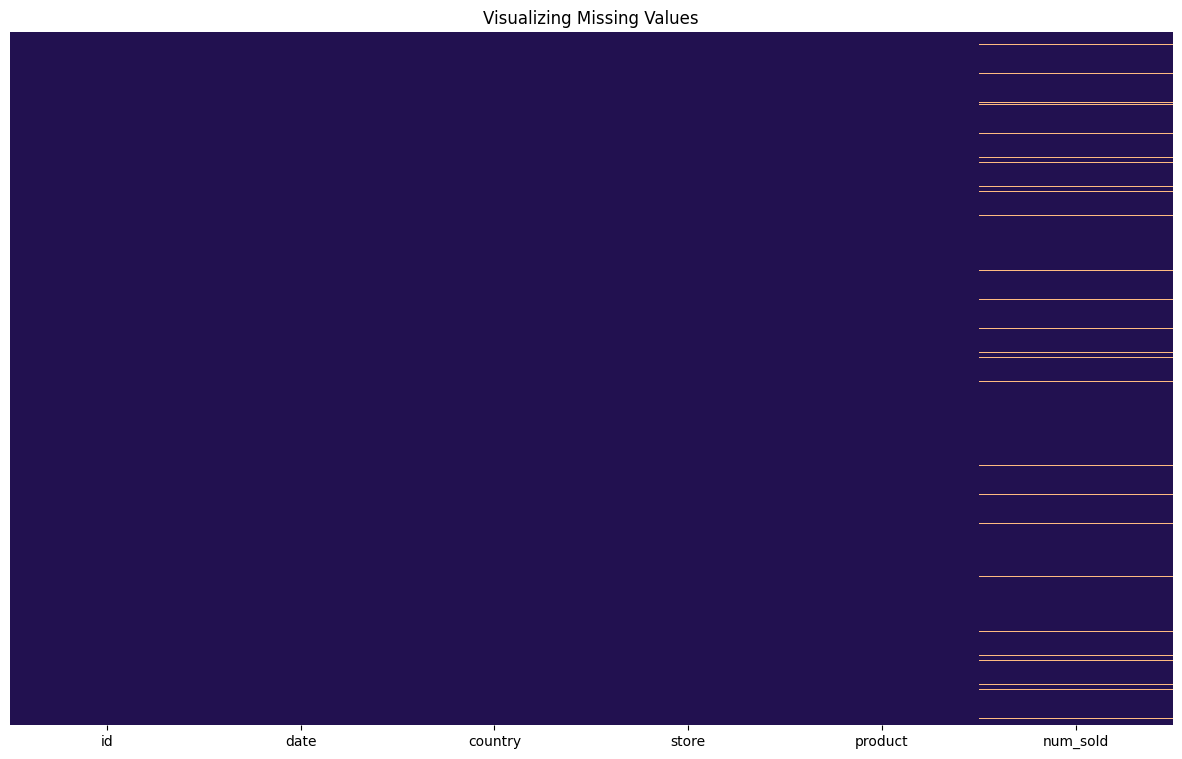

In [11]:
plt.figure(figsize=(15,9))
plt.title("Visualizing Missing Values")
sns.heatmap(X_train.isnull(), cbar=False, cmap=sns.color_palette('magma'), yticklabels=False)
plt.show()

## Visual Exploration

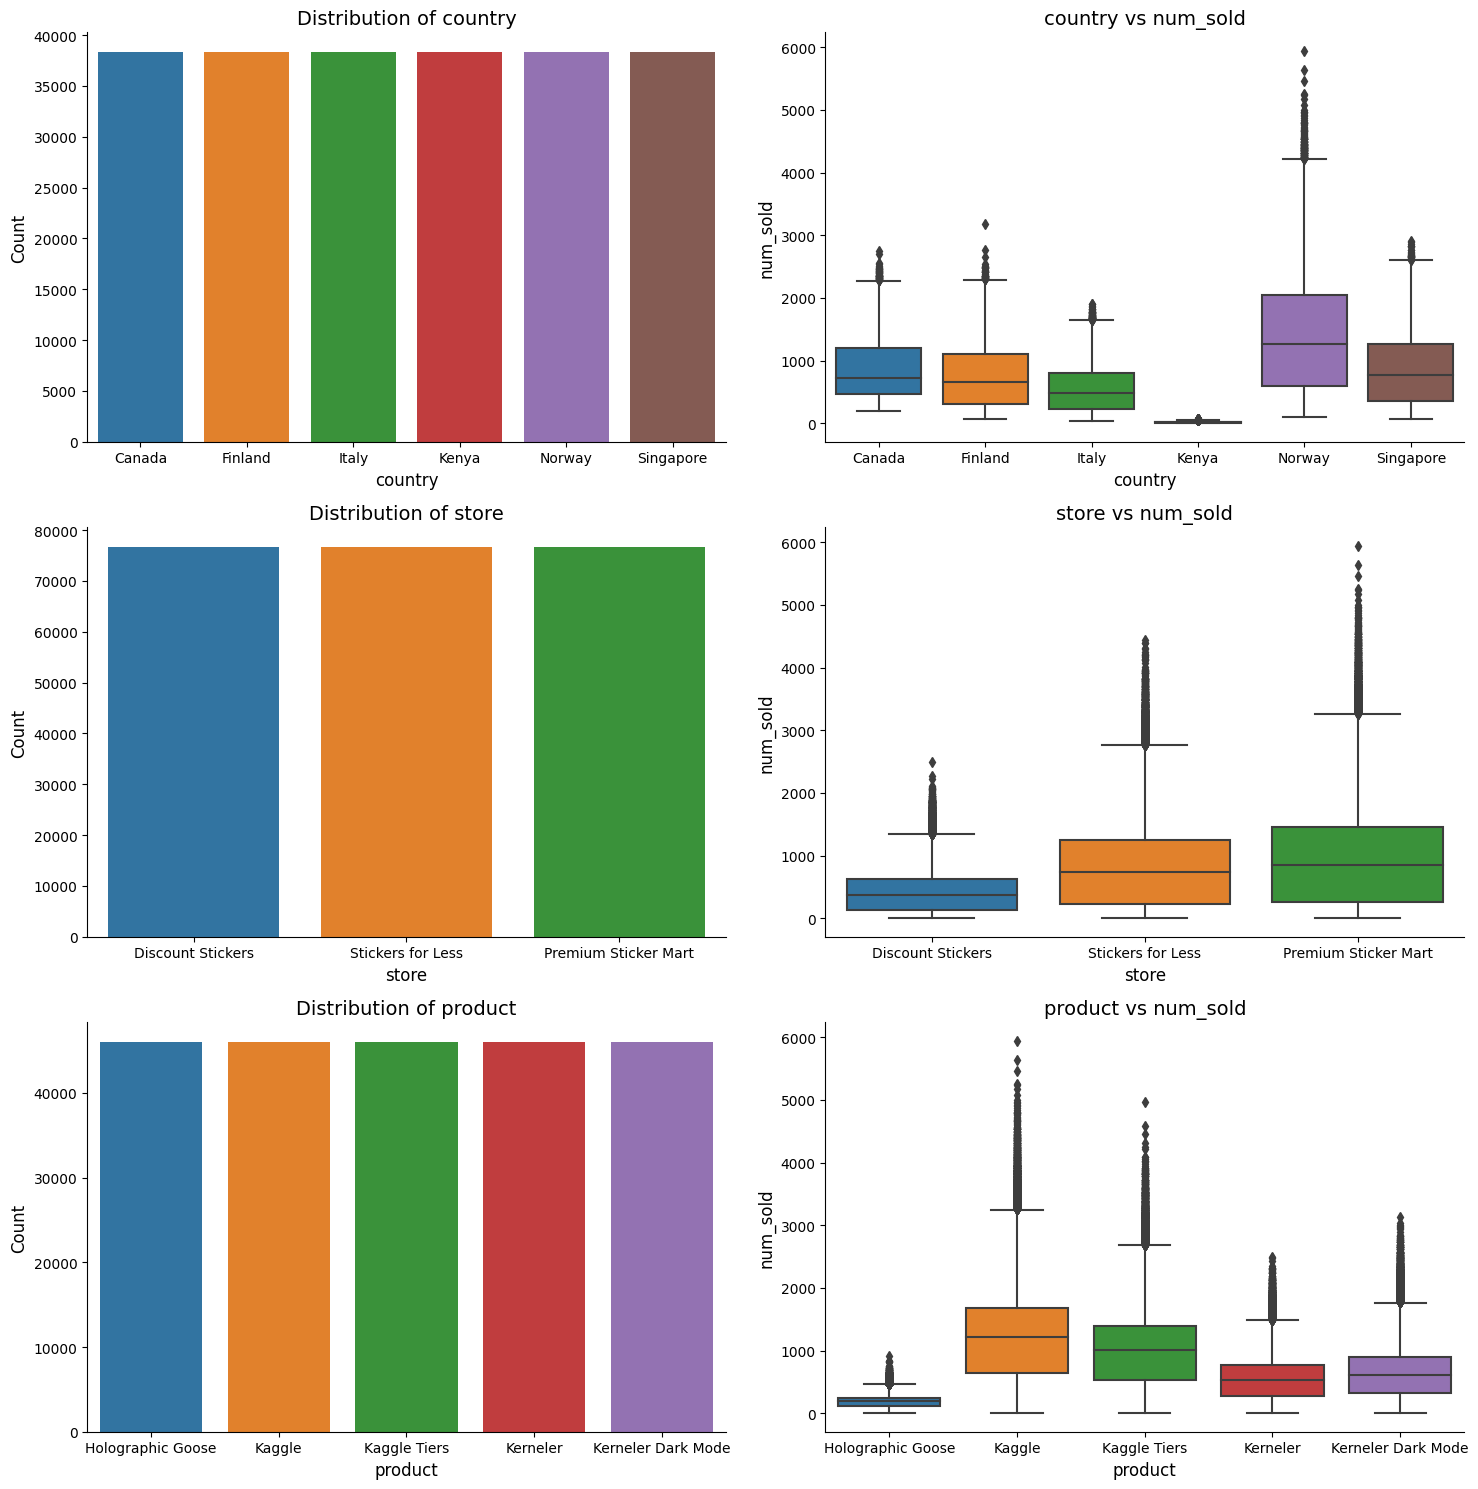

In [12]:
filtered_columns = [col for col in categorical_columns if col != 'date']

fig, axes = plt.subplots(len(filtered_columns), 2, figsize=(15, 5 * len(filtered_columns)))

for i, column in enumerate(filtered_columns):
    sns.countplot(data=X_train, x=column, ax=axes[i, 0], palette='tab10')
    axes[i, 0].set_title(f'Distribution of {column}', fontsize=14)
    axes[i, 0].set_xlabel(column, fontsize=12)
    axes[i, 0].set_ylabel('Count', fontsize=12)
    sns.despine(ax=axes[i, 0])

    sns.boxplot(data=X_train, x=column, y=target_column, ax=axes[i, 1], palette='tab10')
    axes[i, 1].set_title(f'{column} vs {target_column}', fontsize=14)
    axes[i, 1].set_xlabel(column, fontsize=12)
    axes[i, 1].set_ylabel(target_column, fontsize=12)
    sns.despine(ax=axes[i, 1])

plt.tight_layout()   
plt.show()

<Axes: xlabel='num_sold', ylabel='Density'>

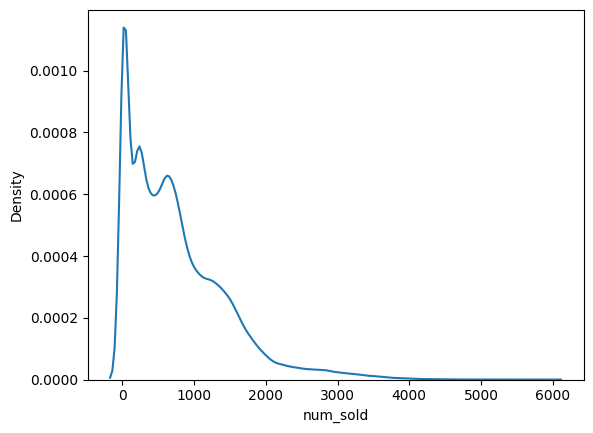

In [13]:
sns.kdeplot(X_train['num_sold'])

## Conclusions

After EDA we can draw some conclusions about our data (not including time series for now):
* Our dataset contains from 6 features. Our target variable is 'num_sold'.
* Categorical features are uniformly distributed meaning that we have equal number of records of different categories.
* Target variable contains missing values, which we should process carefully later, cause in time series context we forecasting our sales from previous data, so a wrong way for imputation can skew our results.
* Num_sold contains a high number of outliers for different categories. From this we can suggest that at some specific time of year (e.g holidays) number of sales are increasing.
* Num_sold is positively skewed (to right), so later we may consider to apply transformation to variable.

# Time Series EDA

Previously we've done EDA for other features, but I decided to make analysis for time series as separate chapter, cause EDA for time series is different than other features.

## Analysing Missing Values

In this section we'll have a look on data that contains NaN in our target variable.

In [14]:
missing_num_sold_df = X_train[X_train['num_sold'].isna()]
missing_num_sold_df

id        date country              store            product  \
0            0  2010-01-01  Canada  Discount Stickers  Holographic Goose   
45          45  2010-01-01   Kenya  Discount Stickers  Holographic Goose   
90          90  2010-01-02  Canada  Discount Stickers  Holographic Goose   
135        135  2010-01-02   Kenya  Discount Stickers  Holographic Goose   
180        180  2010-01-03  Canada  Discount Stickers  Holographic Goose   
...        ...         ...     ...                ...                ...   
229905  229905  2016-12-29   Kenya  Discount Stickers  Holographic Goose   
229950  229950  2016-12-30  Canada  Discount Stickers  Holographic Goose   
229995  229995  2016-12-30   Kenya  Discount Stickers  Holographic Goose   
230040  230040  2016-12-31  Canada  Discount Stickers  Holographic Goose   
230085  230085  2016-12-31   Kenya  Discount Stickers  Holographic Goose   

        num_sold  
0            NaN  
45           NaN  
90           NaN  
135          NaN  
180          NaN  
...          ...  
229905       NaN  
229950       NaN  
229995       NaN  
230040       NaN  
230085       NaN  

[8871 rows x 6 columns]

Hmm, from first look it seems that all missing values are coming from the same place. Let's print value_counts for each categorical column

In [15]:
for c in ['country', 'store', 'product']:
    print(missing_num_sold_df[c].value_counts())
    print()

country
Kenya     4625
Canada    4246
Name: count, dtype: int64

store
Discount Stickers       5179
Stickers for Less       2666
Premium Sticker Mart    1026
Name: count, dtype: int64

product
Holographic Goose     8806
Kerneler                64
Kerneler Dark Mode       1
Name: count, dtype: int64



Indeed! **Most of missing data** are coming from **Holographic Goose Product**.

While exploring discussions I've come to conclusion that most suitable approach is to drop rows with missing data. The reason behind this that in time series forecasting is highly depending on previous values. If we've decided to impute data with mean for example, it would skew our results and perfomance will be poor.
 

## Dropping Missing values

Typically it's not a part of EDA, but later we would decompose our time series, so we need to drop missing values accordingly.

In [16]:
X_train = X_train.dropna(axis=0)

In [17]:
X_train.isna().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [18]:
X_train.date = X_train.date.astype('datetime64[ns]')

## Total Sales Over Time

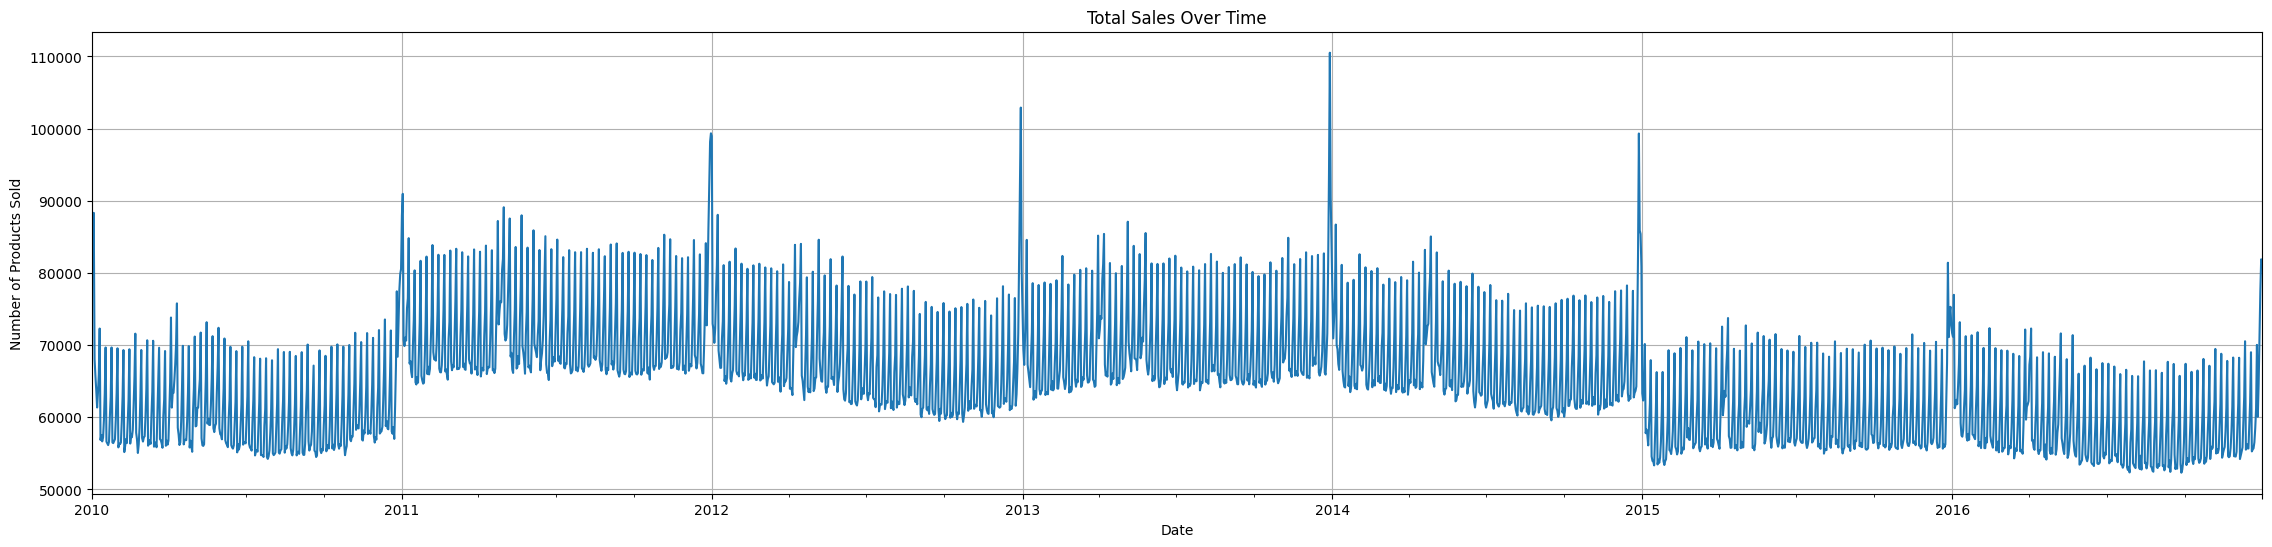

In [19]:
plt.figure(figsize=(28, 6))
X_train.groupby('date')['num_sold'].sum().plot(title='Total Sales Over Time', xlabel='Date', ylabel='Number of Products Sold')
plt.grid()
plt.show()

## Sales Over Time Per Product

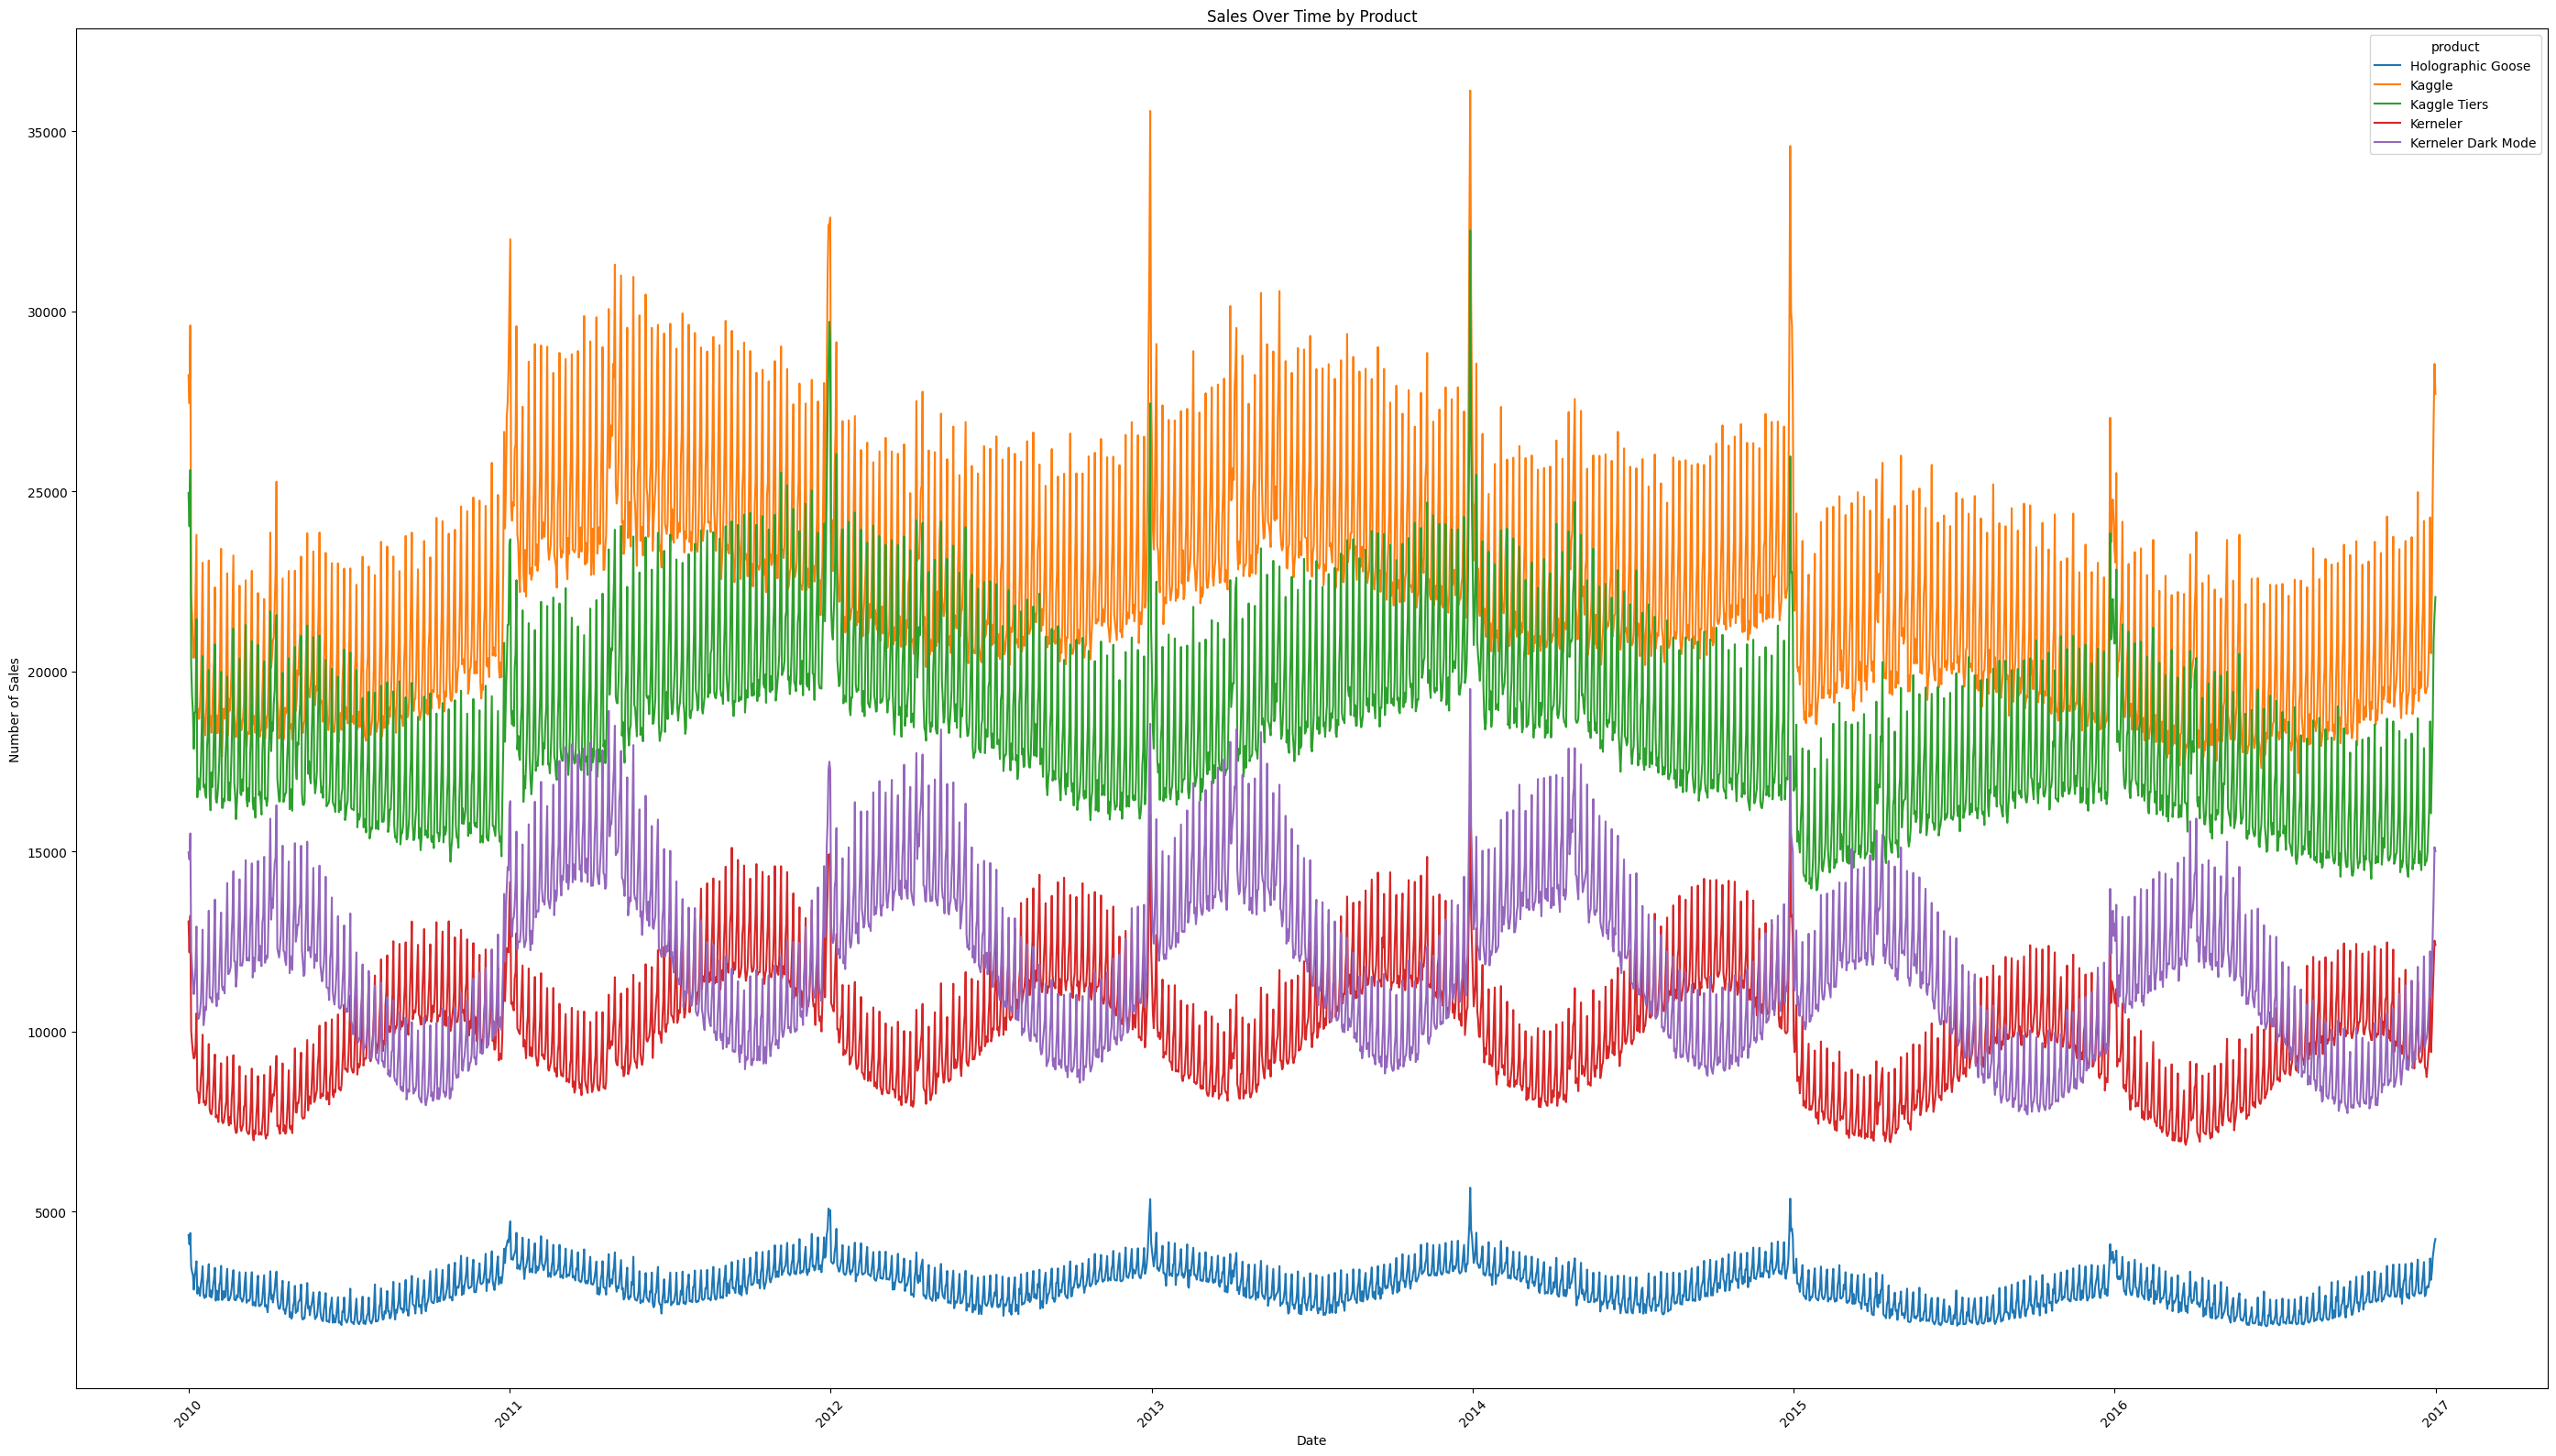

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28, 16))

df = X_train.copy()

df = df.drop('id', axis=1)

df = df.set_index('date')

grouped = df.groupby(['date', 'product'])[['num_sold']].sum()

sns.lineplot(data=grouped, x=grouped.index.get_level_values('date'), y='num_sold', hue='product')

plt.title('Sales Over Time by Product')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sales Over Time Per Country

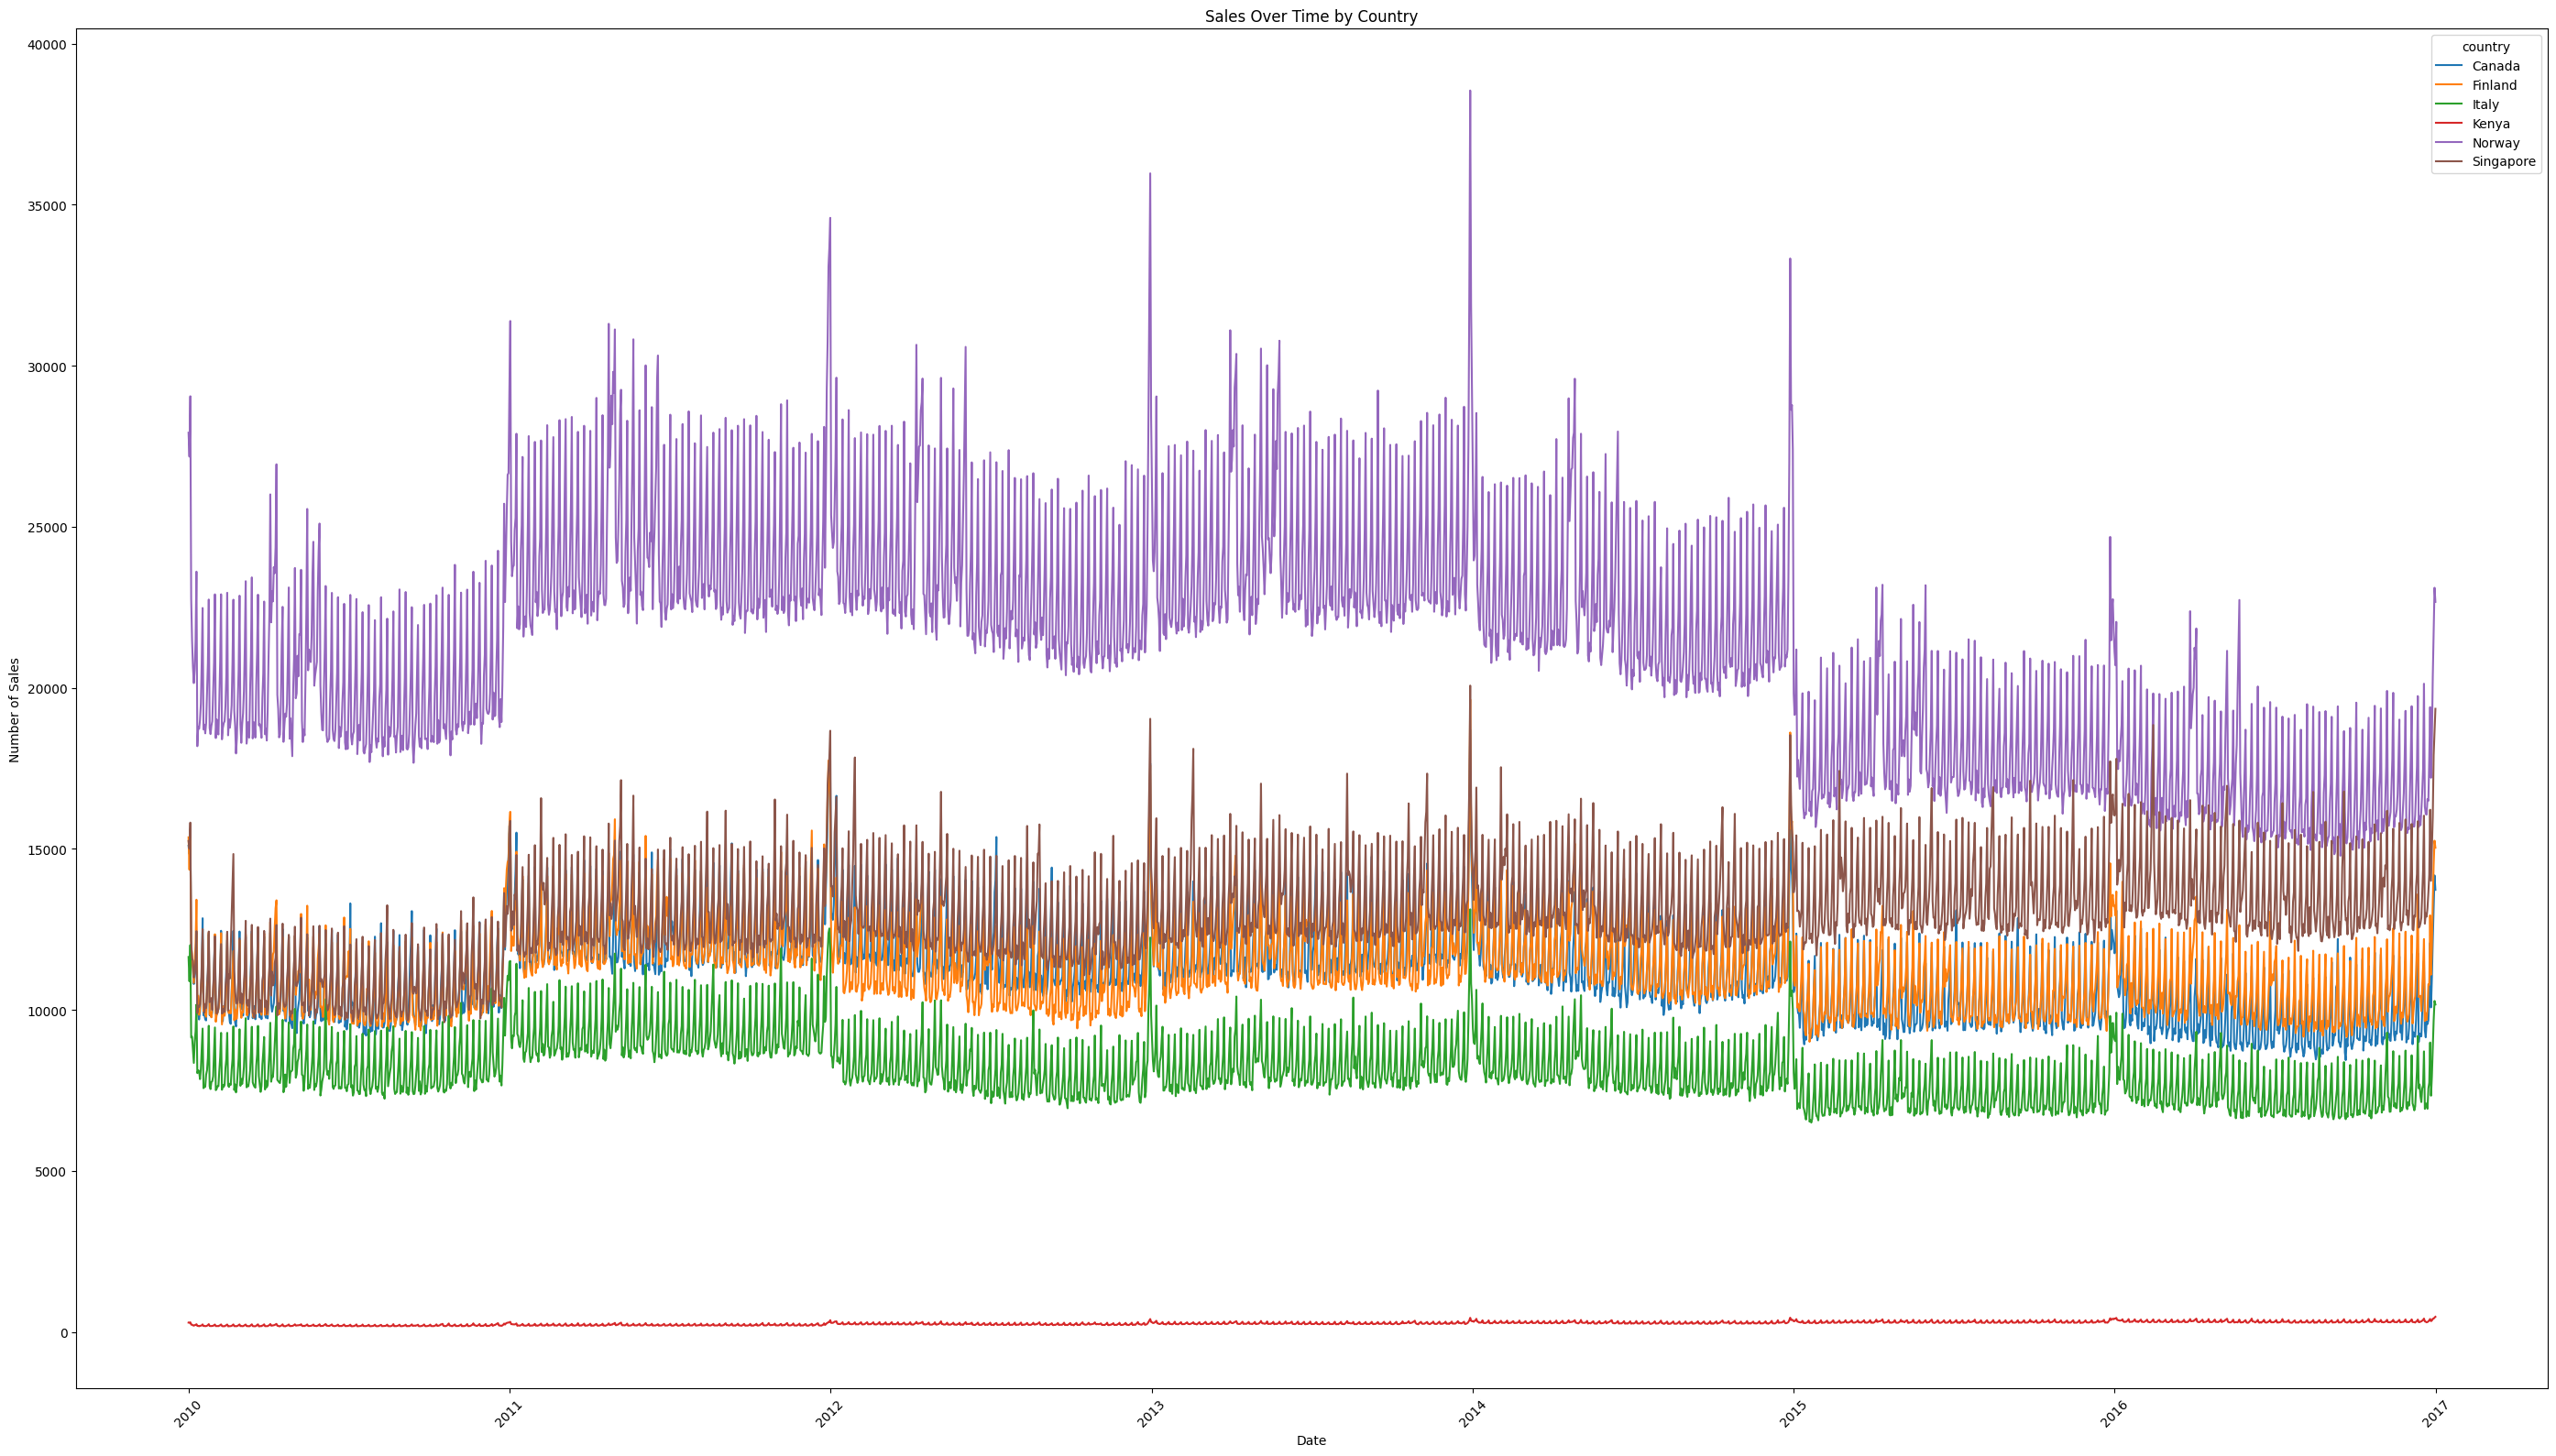

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28, 16))

df = X_train.copy()

df = df.drop('id', axis=1)

df = df.set_index('date')

grouped = df.groupby(['date', 'country'])[['num_sold']].sum()

sns.lineplot(data=grouped, x=grouped.index.get_level_values('date'), y='num_sold', hue='country')

plt.title('Sales Over Time by Country')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Sales Over Time Per Store

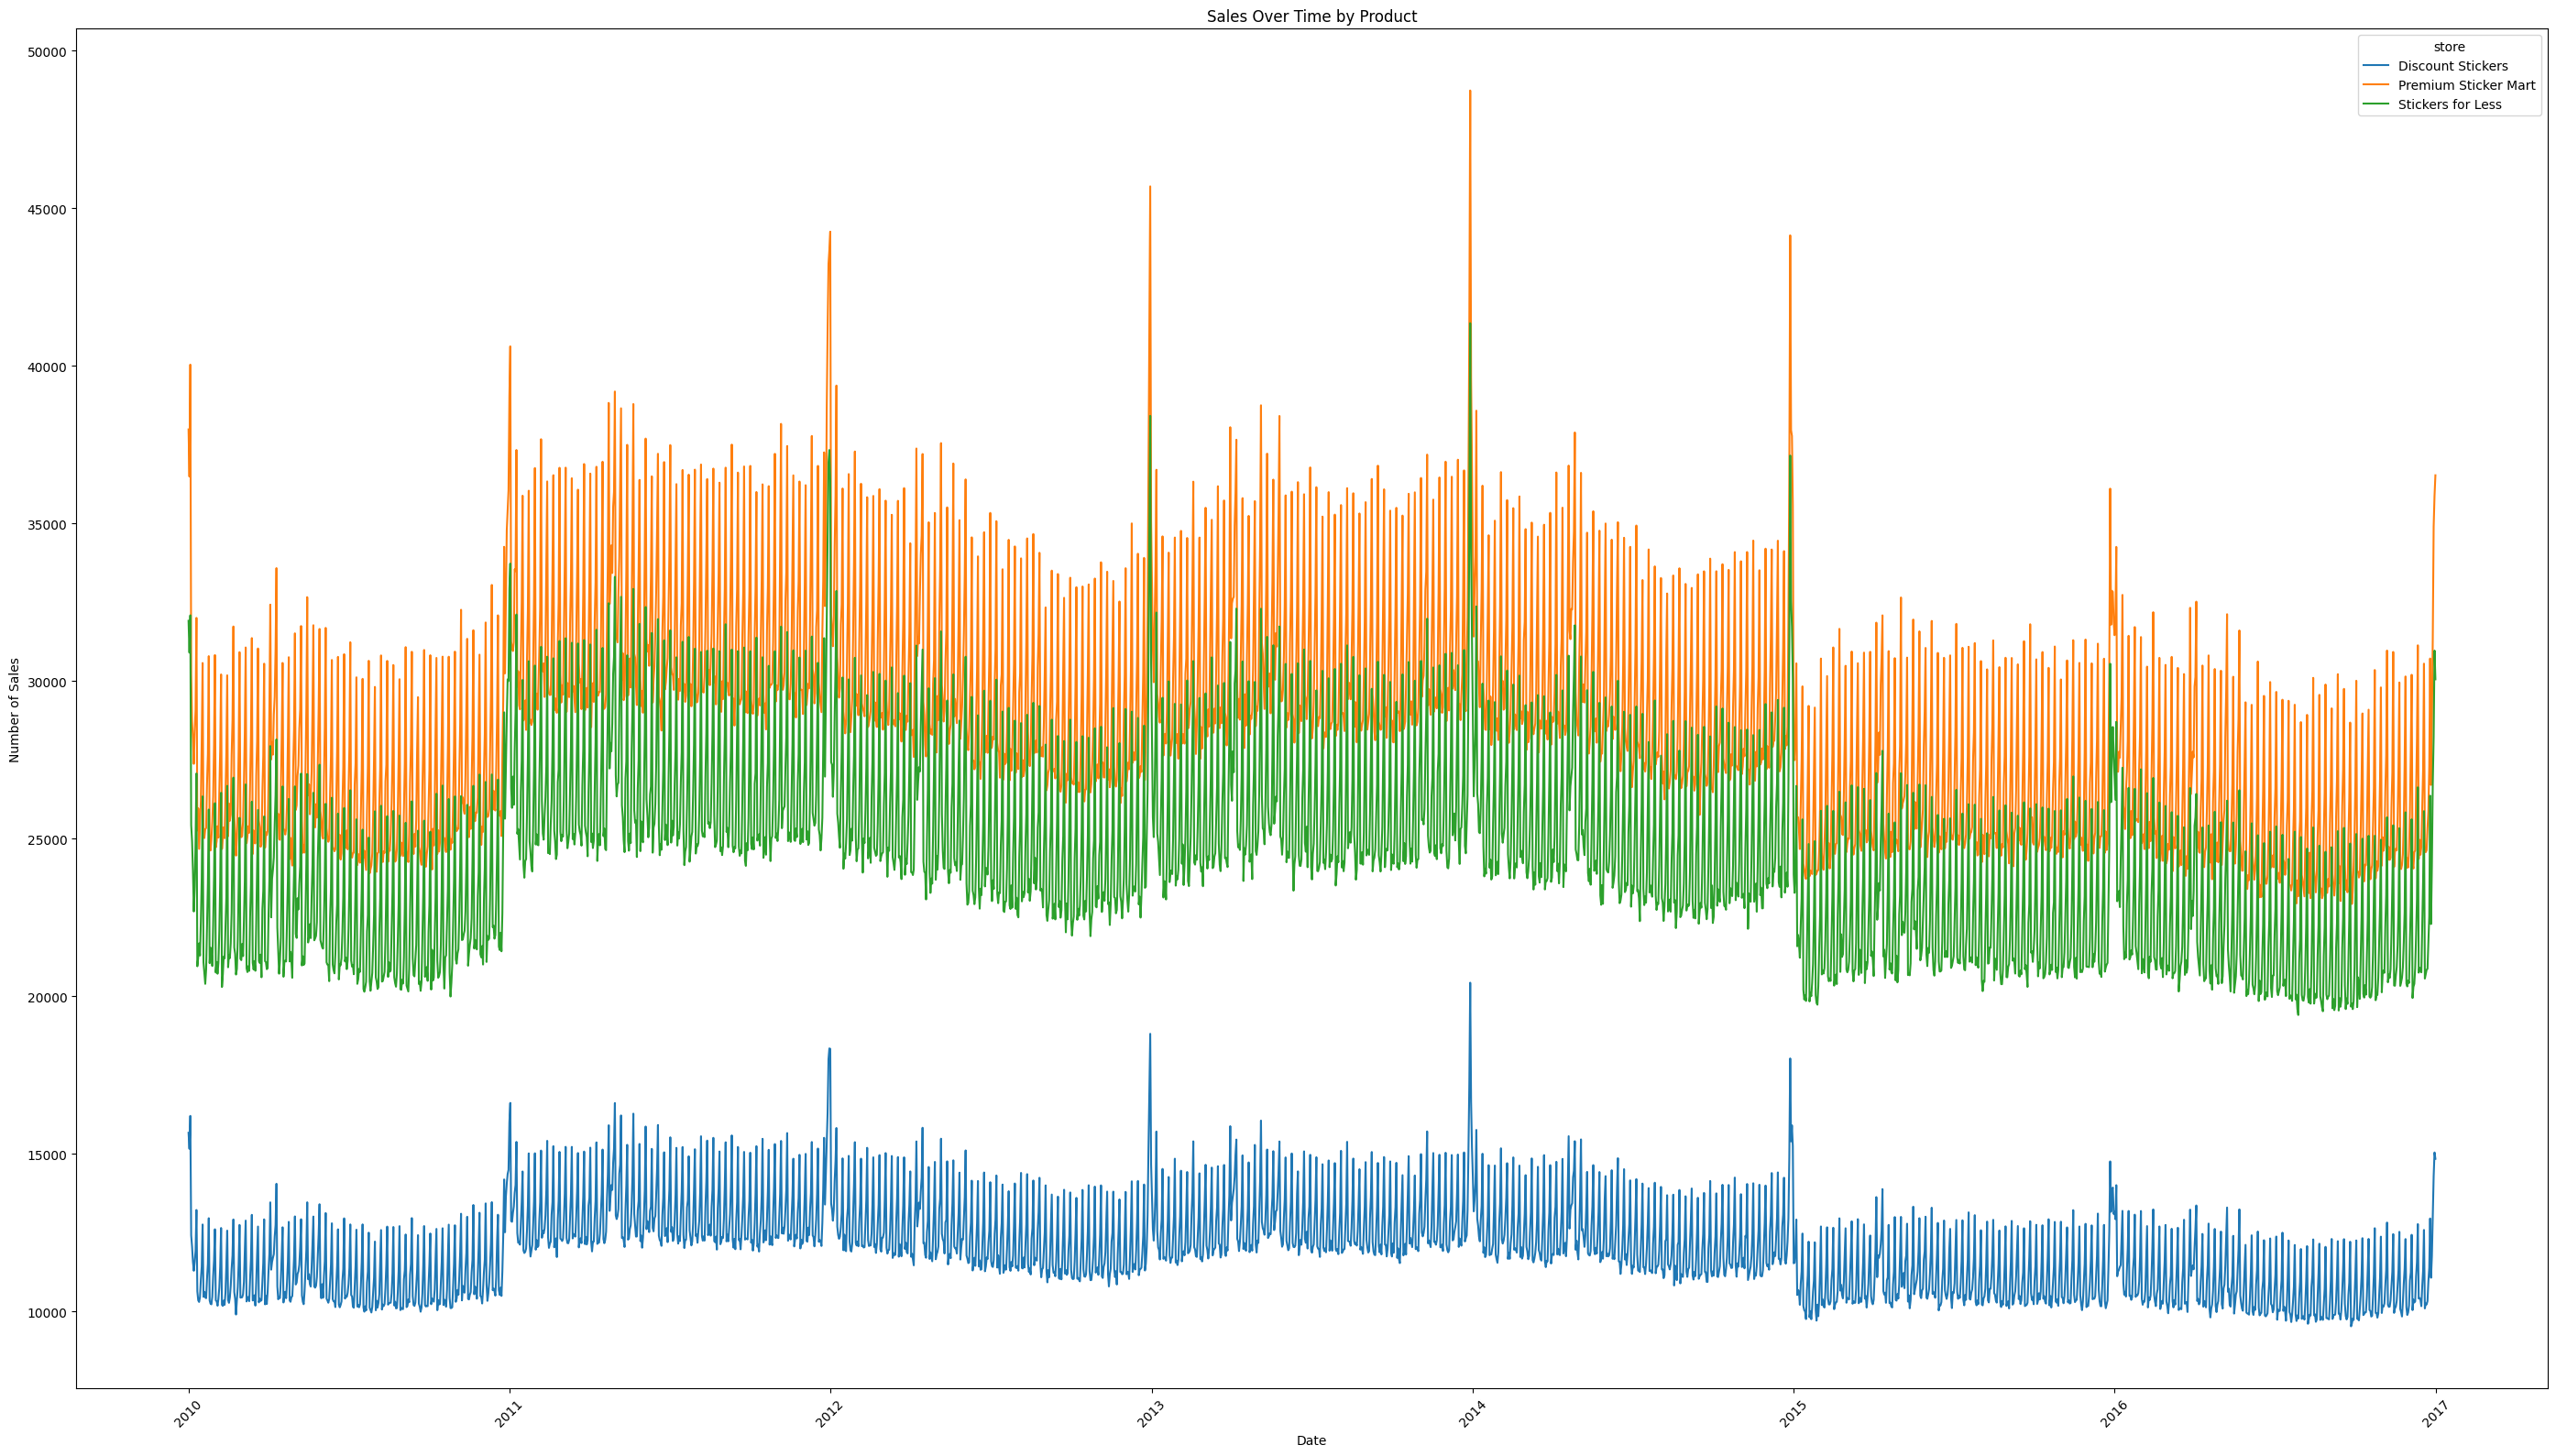

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(28, 16))

df = X_train.copy()

df = df.drop('id', axis=1)

df = df.set_index('date')

grouped = df.groupby(['date', 'store'])[['num_sold']].sum()

sns.lineplot(data=grouped, x=grouped.index.get_level_values('date'), y='num_sold', hue='store')

plt.title('Sales Over Time by Product')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Decomposing Time Series

Time Series can be described as few individual components, which are including:
* **Trend**: the long-term direction or pattern in data. Trend can be viewed as straight (increasing or decreasing) line or stable over time.
* **Seasonality**: reflects to regular, repeating patterns withing the data. For example, increasing water bottles sales at summer, this happens every year or so.
* **Cyclic**: similar to seasonality, but with difference that patterns don't happen in fixed time snaps.
* **Noise (Residuals)**: random variation or irregularity that remains after removing the trend and seasonal components.

### Time Series Trend

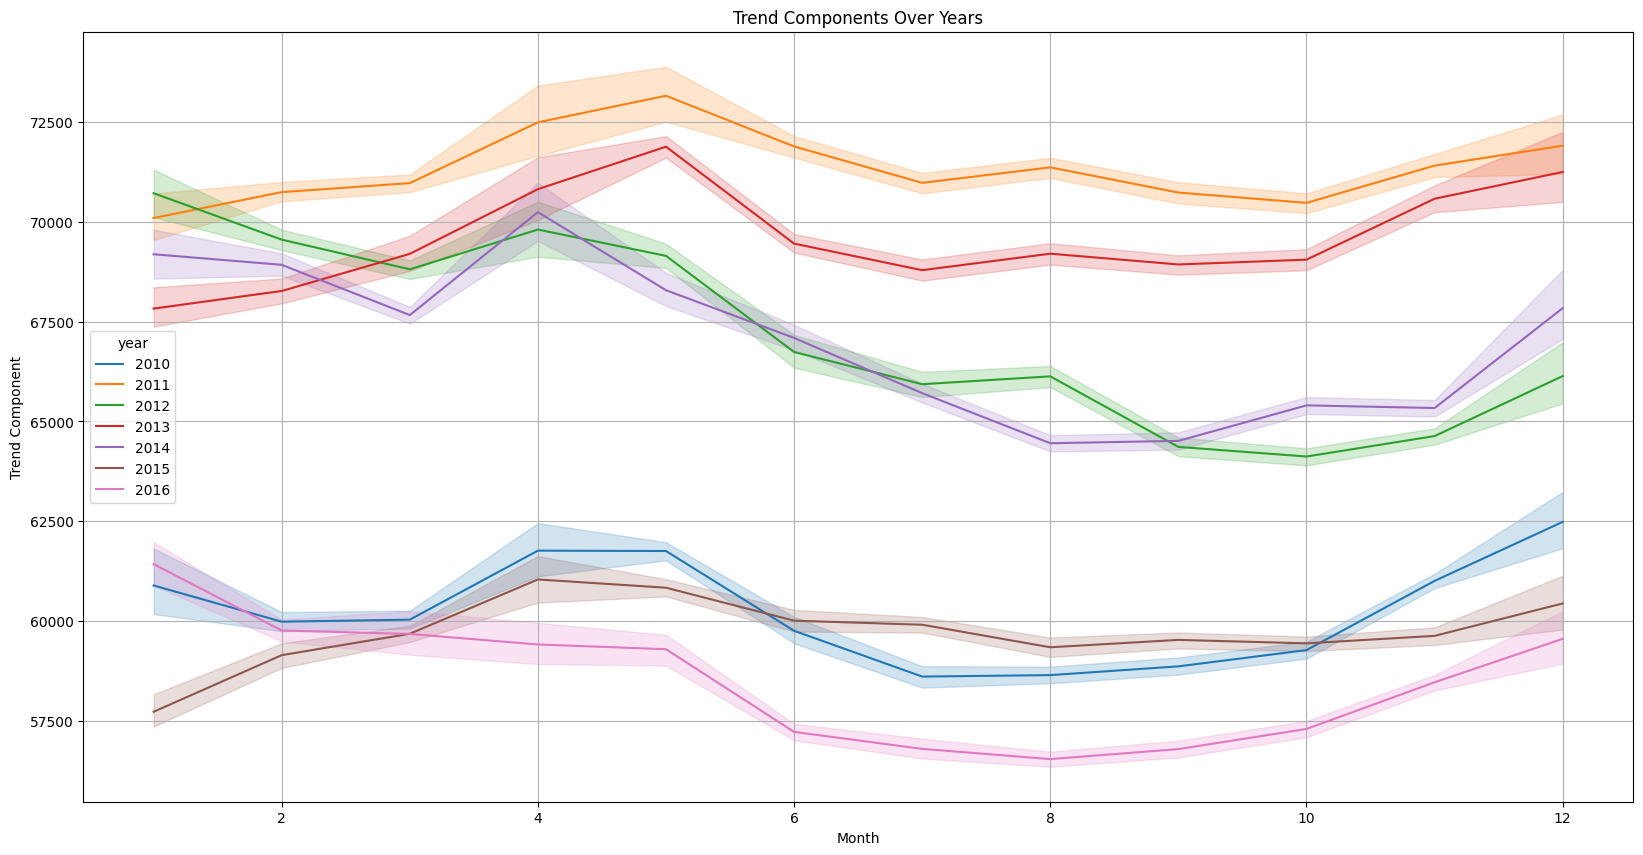

In [23]:
X_data_index = X_train.set_index('date')
from statsmodels.tsa.seasonal import seasonal_decompose

monthly_data = X_data_index.resample('D').sum()

monthly_data['year'] = monthly_data.index.year
monthly_data['month'] = monthly_data.index.month
trend_data = []
for year in monthly_data['year'].unique():
    yearly_data = monthly_data[monthly_data['year'] == year]
    
    decomposition = seasonal_decompose(yearly_data['num_sold'], model='additive', period=12)
    
    trend = pd.DataFrame({
        "trend": decomposition.trend,
        "month": yearly_data['month'],
        "year": year
    })
    trend_data.append(trend)

trend_df = pd.concat(trend_data)

plt.figure(figsize=(20, 10))
sns.lineplot(data=trend_df, x='month', y='trend', hue='year', palette='tab10')
plt.title("Trend Components Over Years")
plt.xlabel("Month")
plt.ylabel("Trend Component")
plt.grid(True)
plt.show()



### Time Series Seasonal

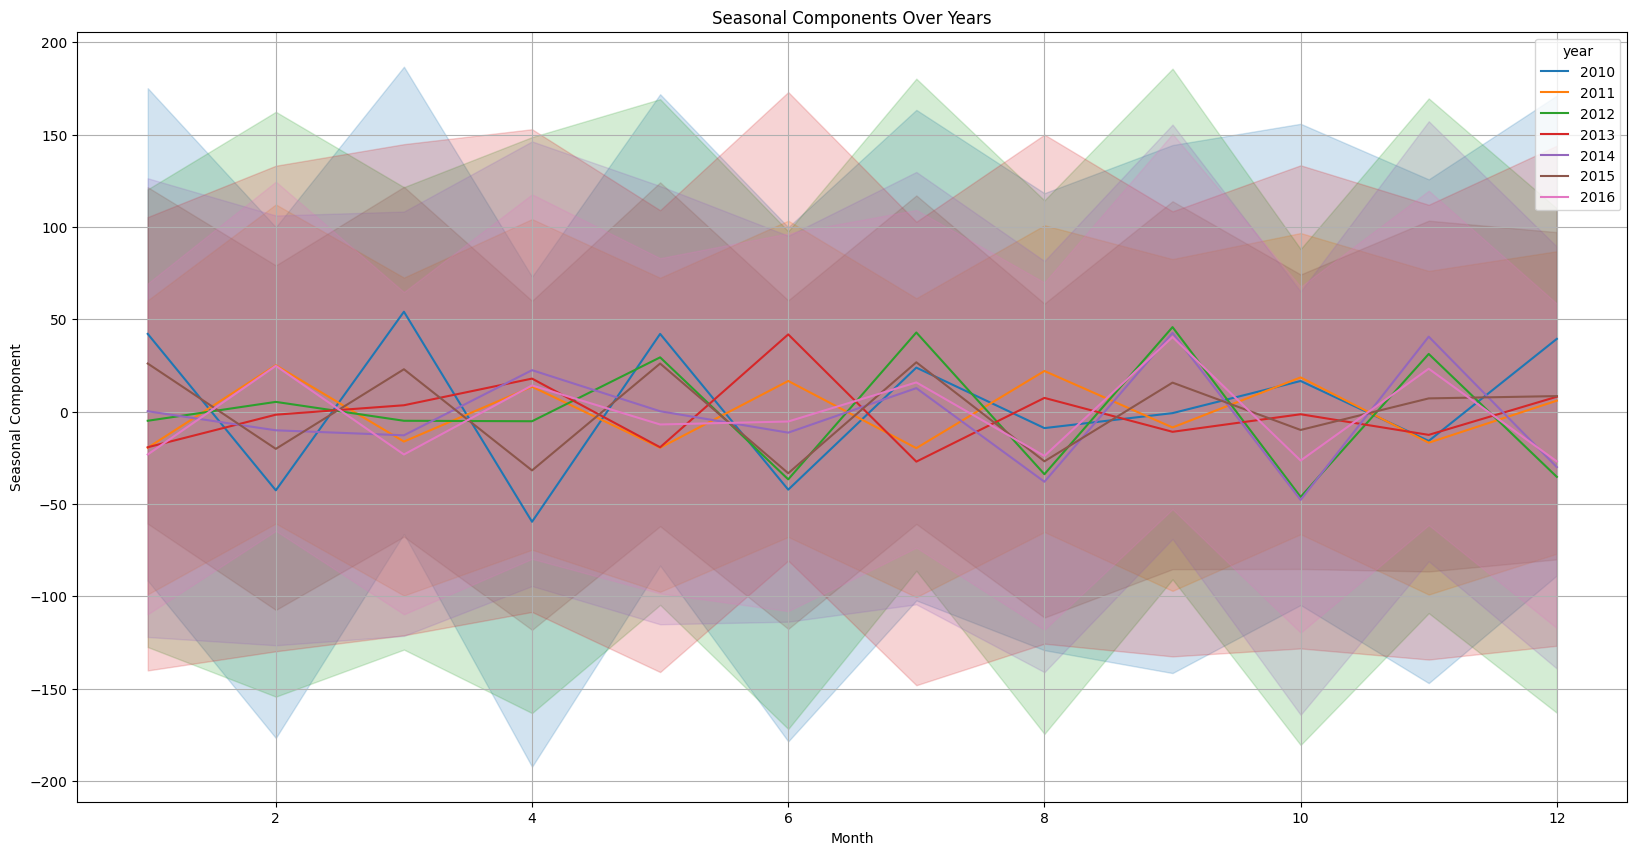

In [24]:
seasonal_data = []
for year in monthly_data['year'].unique():
    yearly_data = monthly_data[monthly_data['year'] == year]
    

    decomposition = seasonal_decompose(yearly_data['num_sold'], model='additive', period=12)
    
    seasonal = pd.DataFrame({
        "seasonal": decomposition.seasonal,
        "month": yearly_data['month'],
        "year": year
    })

    seasonal_data.append(seasonal)
    
seasonal_df = pd.concat(seasonal_data)
plt.figure(figsize=(20, 10))
sns.lineplot(data=seasonal_df, x='month', y='seasonal', hue='year', palette='tab10')
plt.title("Seasonal Components Over Years")
plt.xlabel("Month")
plt.ylabel("Seasonal Component")
plt.grid(True)
plt.show()
 

### Time Series Residuals

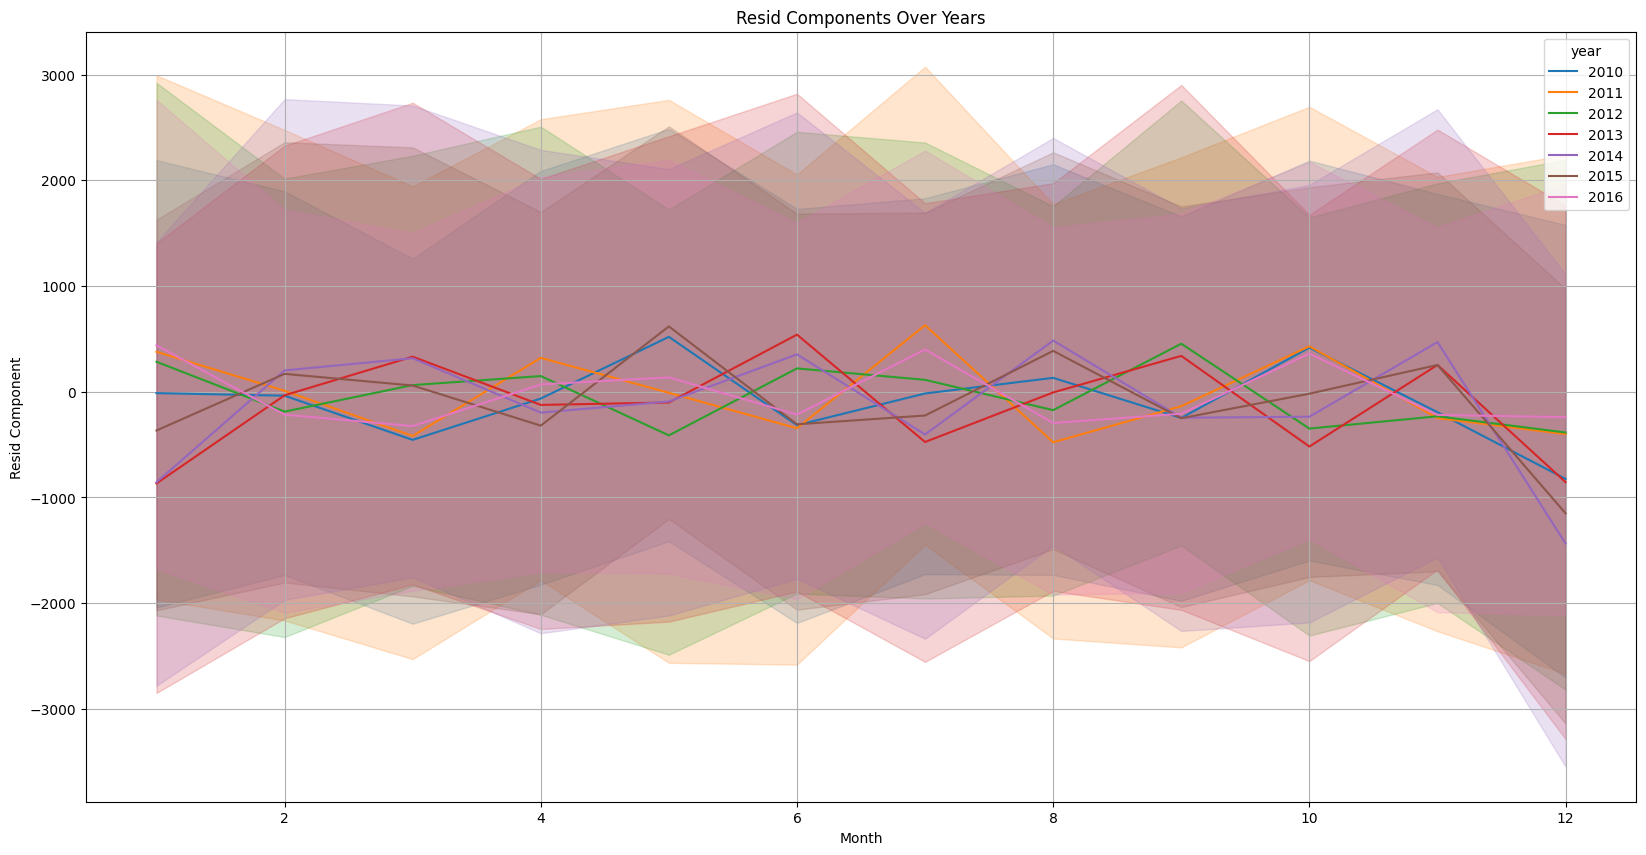

In [25]:
resid_data = []
for year in monthly_data['year'].unique():
    yearly_data = monthly_data[monthly_data['year'] == year]
    

    decomposition = seasonal_decompose(yearly_data['num_sold'], model='additive', period=12)
    
    resid = pd.DataFrame({
        "resid": decomposition.resid,
        "month": yearly_data['month'],
        "year": year
    })

    resid_data.append(resid)
    
resid_df = pd.concat(resid_data)
plt.figure(figsize=(20, 10))
sns.lineplot(data=resid_df, x='month', y='resid', hue='year', palette='tab10')
plt.title("Resid Components Over Years")
plt.xlabel("Month")
plt.ylabel("Resid Component")
plt.grid(True)
plt.show()

## Stationary Testing

Let's check series stationarity by using Augmented DickeyвЂ“Fuller test

In [26]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(series, title=''):
    print(f"Results of ADF Test on {title}:")
    result = adfuller(series, autolag='AIC')
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Non-stationary")
    else:
        print("stationary")
    for key, value in result[4].items():
        print(f"Critical Value ({key}): {value}")
    print("\n")

test_stationarity(X_train['num_sold'], 'Sold')

Results of ADF Test on Sold:
ADF Statistic: -32.10570496433414
p-value: 0.0
stationary
Critical Value (1%): -3.430379566523776
Critical Value (5%): -2.8615530680191887
Critical Value (10%): -2.5667769556355844




It seems that our time series is stationary, since p-value = 0.0 and so no further differencing is required before applying models like ARIMA or SARIMA.

# Forecasting Time Series
In this section I will try to forecast time series by using statistical methods (ARIMA, SARIMA etc) and machine learning methods. It will be interesting to give it a try for different approaches.


## Statistical approaches


### ARIMA

ARIMA stands for AutoRegressive Integrated Moving Average

### Finding ARIMA parameters


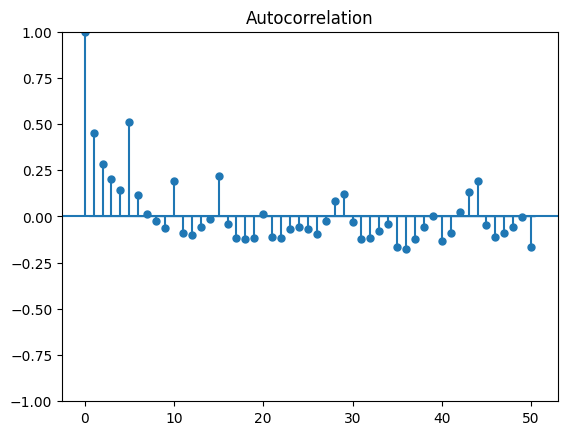

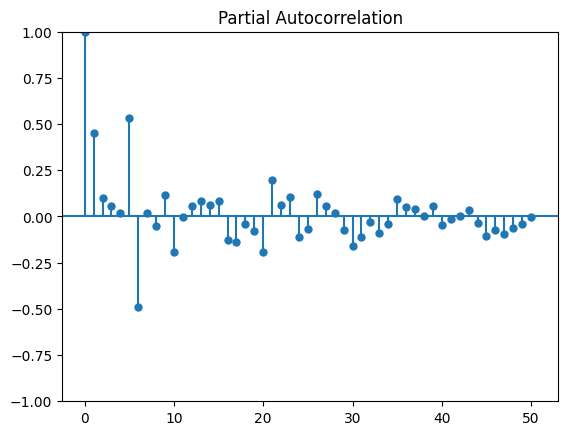

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(X_train['num_sold'], lags=50)
plot_pacf(X_train['num_sold'], lags=50)
plt.show()

In [28]:
train_end = '2015-01-01'
val_end = '2017-01-01'

train_data = X_train[X_train['date'] < train_end]
val_data = X_train[(X_train['date'] >= train_end) & (X_train['date'] < val_end)]

train_data = train_data.groupby('date')['num_sold'].sum()
val_data = val_data.groupby('date')['num_sold'].sum()

train_data = train_data.asfreq('D', method='pad') 
val_data = val_data.asfreq('D', method='pad')     

print(f"Train data: {train_data.shape}")
print(f"Validation data: {val_data.shape}")

print(train_data.head())
print(val_data.head())


Train data: (1826,)
Validation data: (731,)
date
2010-01-01    85566.0
2010-01-02    82548.0
2010-01-03    88328.0
2010-01-04    68075.0
2010-01-05    65713.0
Freq: D, Name: num_sold, dtype: float64
date
2015-01-01    63321.0
2015-01-02    62324.0
2015-01-03    64411.0
2015-01-04    70151.0
2015-01-05    57796.0
Freq: D, Name: num_sold, dtype: float64


Since I'm running models on my pc for speed saving while pushing scripts to Kaggle I commented sections with (S)ARIMA code

In [29]:
# import pmdarima as pm
# auto_arima = pm.auto_arima(train_data, stepwise=False, seasonal=True)
# print(auto_arima)

In [30]:
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.arima.model import ARIMA


# model_train = ARIMA(train_data, order=(4,1,1))
# model_train_fit = ''



# history_endog = list(train_data.copy(deep=True))
# y_true = []
# y_pred = []

# for obs in val_data: 
#     model = ARIMA(endog=history_endog, order=(2, 1, 1))
#     model_train_fit = model.fit()
#     forecast = model_train_fit.forecast()[0]

#     y_true.append(obs)
#     y_pred.append(forecast)
#     history_endog.append(obs)






In [31]:
# test_forecast = model_train_fit.get_forecast(steps=len(val_data))
# test_forecast_series = pd.Series(y_pred, index=val_data.index)

In [32]:

# plt.figure(figsize=(14,7))
# plt.plot(train_data, label='Training Data')
# plt.plot(val_data, label='Actual Data', color='orange')
# plt.plot(test_forecast_series, label='Forecasted Data', color='green')
# plt.title('ARIMA Model Evaluation')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.show()



In [33]:
# # Predict specific points in x_test
# x_test_forecasts = []

# for i in range(X_test.shape[0]):
#     # Fit ARIMA model on the updated history
#     model = ARIMA(endog=history_endog, order=(2, 1, 1))
#     model_fit = model.fit()

#     # Forecast the next point (use the ARIMA model)
#     forecast = model_fit.forecast()[0]
#     x_test_forecasts.append(forecast)

#     # (Optional) Add the predicted value to the history for rolling prediction
#     history_endog.append(forecast)

# # Convert x_test_forecasts to a numpy array
# x_test_forecasts = np.array(x_test_forecasts)

# # Print x_test forecasts
# print(f"x_test Forecasts: {x_test_forecasts}")

In [34]:
# subm = pd.DataFrame({
#     "id": test_ids,
#     "num_sold": x_test_forecasts
# })

# subm.to_csv('arima_sum')

### SARIMA

In [35]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# model_train = SARIMAX(
#     train_data, 
#     order=(1, 1, 2),       
#     seasonal_order=(1, 1, 1, 7), 
#     enforce_stationarity=False,
#     enforce_invertibility=False
# )

# model_train_fit = model_train.fit(disp=False)

# print(model_train_fit.summary())

# test_forecast = model_train_fit.get_forecast(steps=len(val_data))

# forecast_series = test_forecast.predicted_mean

In [36]:
# # Create a plot to compare the forecast with the actual test data
# plt.figure(figsize=(14,7))
# plt.plot(train_data, label='Training Data')
# plt.plot(val_data, label='Actual Data', color='orange')
# plt.plot(forecast_series, label='Forecasted Data', color='green')
# plt.fill_between(val_data.index, 
#                  test_forecast.conf_int().iloc[:, 0], 
#                  test_forecast.conf_int().iloc[:, 1], 
#                  color='k', alpha=.15)
# plt.title('SARIMA Model Evaluation')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.legend()
# plt.show()


## Machine Learning Methods

In [37]:
X_train = pd.read_csv(f'{BASE_PATH}train.csv')
X_test = pd.read_csv(f'{BASE_PATH}test.csv')

## Feature enginereing

In [38]:
# def time_features(df):
#     col = 'date'
#     df['day'] = df.date.dt.day
#     df['month'] = df.date.dt.month
#     df['year'] = df.date.dt.year
#     df['quarter'] = df.date.dt.quarter
#     df['dayofyear'] = df.date.dt.dayofyear
#     df['weekday'] = df.date.dt.weekday
#     df['sine_day'] = np.sin(2 * np.pi * df['day'] / 31)
#     df['cos_day'] = np.cos(2 * np.pi * df['day'] / 31)
#     df['sine_month'] = np.sin(2 * np.pi * df['month'] / 12)
#     df['cos_month'] = np.cos(2 * np.pi * df['month'] / 12)
#     df['sine_year'] = np.sin(2 * np.pi * df['year'])
#     df['cos_year'] = np.cos(2 * np.pi * df['year'])
#     df['sine_quarter'] = np.sin(2 * np.pi * df['quarter'] / 4)
#     df['cos_quarter'] = np.cos(2 * np.pi * df['quarter'] / 4)
#     df['sine_dayofyear'] = np.sin(2 * np.pi * df['dayofyear'] / 366)
#     df['cos_dayofyear'] = np.cos(2 * np.pi * df['dayofyear'] / 366)
#     df['sine_weekday'] = np.sin(2 * np.pi * df['weekday'] / 7)
#     df['cos_weekday'] = np.cos(2 * np.pi * df['weekday'] / 7)
    
#     # Add group feature (for time-based grouping)
#     df[f'{col}_Group'] = (df[f'{col}_year'] - 2010) * 48 + df[f'{col}_month'] * 4 + df[f'{col}_day'] // 7
    

#     return df


def time_features(df):
    col = 'date'
   # Extract temporal features
    df[f'{col}_year'] = df[col].dt.year.astype('float64')
    df[f'{col}_quarter'] = df[col].dt.quarter.astype('float64')
    df[f'{col}_month'] = df[col].dt.month.astype('float64')
    df[f'{col}_day'] = df[col].dt.day.astype('float64')
    df[f'{col}_day_of_week'] = df[col].dt.dayofweek.astype('float64')
    df[f'{col}_week_of_year'] = df[col].dt.isocalendar().week.astype('float64')
    df[f'{col}_hour'] = df[col].dt.hour.astype('float64')
    df[f'{col}_minute'] = df[col].dt.minute.astype('float64')
    
    # Add cyclical encodings
    df[f'{col}_day_sin'] = np.sin(2 * np.pi * df[f'{col}_day'] / 365.0)
    df[f'{col}_day_cos'] = np.cos(2 * np.pi * df[f'{col}_day'] / 365.0)
    df[f'{col}_month_sin'] = np.sin(2 * np.pi * df[f'{col}_month'] / 12.0)
    df[f'{col}_month_cos'] = np.cos(2 * np.pi * df[f'{col}_month'] / 12.0)
    df[f'{col}_year_sin'] = np.sin(2 * np.pi * df[f'{col}_year'] / 7.0)
    df[f'{col}_year_cos'] = np.cos(2 * np.pi * df[f'{col}_year'] / 7.0)
    
    # Add group feature (for time-based grouping)
    df[f'{col}_Group'] = (df[f'{col}_year'] - 2010) * 48 + df[f'{col}_month'] * 4 + df[f'{col}_day'] // 7
    

    return df

In [39]:
import holidays
def holiday_features(df):
    df['is_holiday'] = 0
    country_codes = {
        "Finland": "FI",
        "Italy": "IT",
        "Norway": "NO",
        "Singapore": "SG",
        "Canada": "CA",
        "Kenya": "KE"
    }
    
    for i in range(df.shape[0]):
        ct = country_codes[df.iloc[i].country]
        ct_holidays = holidays.country_holidays(ct)

        if df.iloc[i].date in ct_holidays:
            df['is_holiday']= 1

    return df

In [40]:
X_train.date = X_train.date.astype('datetime64[ns]')
X_test.date = X_test.date.astype('datetime64[ns]')

In [41]:
train_data_ft = time_features(X_train)
train_data_ft = holiday_features(train_data_ft)

X_test = time_features(X_test)
X_test = holiday_features(X_test)

In [42]:
import requests

def get_gdp_per_capita(alpha3, year):
    url='https://api.worldbank.org/v2/country/{0}/indicator/NY.GDP.PCAP.CD?date={1}&format=json'
    response = requests.get(url.format(alpha3,year)).json()
    return response[1][0]['value']

def add_gdp_column(df_in):
    df = df_in[['date','country']].copy()
    alpha3s = ['CAN', 'FIN', 'ITA', 'KEN', 'NOR', 'SGP']
    df['alpha3'] = df['country'].map(dict(zip(
        np.sort(df['country'].unique()), alpha3s)))
    years = np.sort(df.date.dt.year.unique())
    df['year'] = df.date.dt.year
    gdp = np.array([
        [get_gdp_per_capita(alpha3, year) for year in years]
        for alpha3 in alpha3s
    ])
    gdp = pd.DataFrame(gdp/gdp.sum(axis=0), index=alpha3s, columns=years)
    df['GDP'] = df.apply(lambda s: gdp.loc[s['alpha3'], s['year']], axis=1)

    df_in['GDP'] = df['GDP']
    return df_in

train_data_ft = add_gdp_column(train_data_ft)
X_test = add_gdp_column(X_test)
    
# _, ax = plt.subplots(figsize=(8,10))
# decompose(train, 'country', ax)
# for country in df['country'].unique():
#     mask = df['country']==country
#     ax.plot(df[mask].index,df[mask]['GDP'],'k--')
# plt.show()


In [43]:
X_train

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  date_year  date_quarter  date_month  \
0        Holographic Goose       NaN     2010.0           1.0         1.0   
1                   Kaggle     973.0     2010.0           1.0         1.0   
2             Kaggle Tiers     906.0     2010.0           1.0         1.0   
3                 Kerneler     423.0     2010.0           1.0         1.0   
4       Kerneler Dark Mode     491.0     2010.0           1.0         1.0   
...                    ...       ...        ...           ...         ...   
230125   Holographic Goose     466.0     2016.0           4.0        12.0   
230126              Kaggle    2907.0     2016.0           4.0        12.0   
230127        Kaggle Tiers    2299.0     2016.0           4.0        12.0   
230128            Kerneler    1242.0     2016.0           4.0        12.0   
230129  Kerneler Dark Mode    1622.0     2016.0           4.0        12.0   

        date_day  ...  date_minute  date_day_sin  date_day_cos  \
0            1.0  ...          0.0      0.017213      0.999852   
1            1.0  ...          0.0      0.017213      0.999852   
2            1.0  ...          0.0      0.017213      0.999852   
3            1.0  ...          0.0      0.017213      0.999852   
4            1.0  ...          0.0      0.017213      0.999852   
...          ...  ...          ...           ...           ...   
230125      31.0  ...          0.0      0.508671      0.860961   
230126      31.0  ...          0.0      0.508671      0.860961   
230127      31.0  ...          0.0      0.508671      0.860961   
230128      31.0  ...          0.0      0.508671      0.860961   
230129      31.0  ...          0.0      0.508671      0.860961   

        date_month_sin  date_month_cos  date_year_sin  date_year_cos  \
0         5.000000e-01        0.866025   7.818315e-01        0.62349   
1         5.000000e-01        0.866025   7.818315e-01        0.62349   
2         5.000000e-01        0.866025   7.818315e-01        0.62349   
3         5.000000e-01        0.866025   7.818315e-01        0.62349   
4         5.000000e-01        0.866025   7.818315e-01        0.62349   
...                ...             ...            ...            ...   
230125   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230126   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230127   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230128   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230129   -2.449294e-16        1.000000  -7.053966e-14        1.00000   

        date_Group  is_holiday       GDP  
0              4.0           1  0.178301  
1              4.0           1  0.178301  
2              4.0           1  0.178301  
3              4.0           1  0.178301  
4              4.0           1  0.178301  
...            ...         ...       ...  
230125       340.0           1  0.231100  
230126       340.0           1  0.231100  
230127       340.0           1  0.231100  
230128       340.0           1  0.231100  
230129       340.0           1  0.231100  

[230130 rows x 23 columns]

## Data splitting

In [44]:
train_data_ft

id       date    country                 store  \
0            0 2010-01-01     Canada     Discount Stickers   
1            1 2010-01-01     Canada     Discount Stickers   
2            2 2010-01-01     Canada     Discount Stickers   
3            3 2010-01-01     Canada     Discount Stickers   
4            4 2010-01-01     Canada     Discount Stickers   
...        ...        ...        ...                   ...   
230125  230125 2016-12-31  Singapore  Premium Sticker Mart   
230126  230126 2016-12-31  Singapore  Premium Sticker Mart   
230127  230127 2016-12-31  Singapore  Premium Sticker Mart   
230128  230128 2016-12-31  Singapore  Premium Sticker Mart   
230129  230129 2016-12-31  Singapore  Premium Sticker Mart   

                   product  num_sold  date_year  date_quarter  date_month  \
0        Holographic Goose       NaN     2010.0           1.0         1.0   
1                   Kaggle     973.0     2010.0           1.0         1.0   
2             Kaggle Tiers     906.0     2010.0           1.0         1.0   
3                 Kerneler     423.0     2010.0           1.0         1.0   
4       Kerneler Dark Mode     491.0     2010.0           1.0         1.0   
...                    ...       ...        ...           ...         ...   
230125   Holographic Goose     466.0     2016.0           4.0        12.0   
230126              Kaggle    2907.0     2016.0           4.0        12.0   
230127        Kaggle Tiers    2299.0     2016.0           4.0        12.0   
230128            Kerneler    1242.0     2016.0           4.0        12.0   
230129  Kerneler Dark Mode    1622.0     2016.0           4.0        12.0   

        date_day  ...  date_minute  date_day_sin  date_day_cos  \
0            1.0  ...          0.0      0.017213      0.999852   
1            1.0  ...          0.0      0.017213      0.999852   
2            1.0  ...          0.0      0.017213      0.999852   
3            1.0  ...          0.0      0.017213      0.999852   
4            1.0  ...          0.0      0.017213      0.999852   
...          ...  ...          ...           ...           ...   
230125      31.0  ...          0.0      0.508671      0.860961   
230126      31.0  ...          0.0      0.508671      0.860961   
230127      31.0  ...          0.0      0.508671      0.860961   
230128      31.0  ...          0.0      0.508671      0.860961   
230129      31.0  ...          0.0      0.508671      0.860961   

        date_month_sin  date_month_cos  date_year_sin  date_year_cos  \
0         5.000000e-01        0.866025   7.818315e-01        0.62349   
1         5.000000e-01        0.866025   7.818315e-01        0.62349   
2         5.000000e-01        0.866025   7.818315e-01        0.62349   
3         5.000000e-01        0.866025   7.818315e-01        0.62349   
4         5.000000e-01        0.866025   7.818315e-01        0.62349   
...                ...             ...            ...            ...   
230125   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230126   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230127   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230128   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230129   -2.449294e-16        1.000000  -7.053966e-14        1.00000   

        date_Group  is_holiday       GDP  
0              4.0           1  0.178301  
1              4.0           1  0.178301  
2              4.0           1  0.178301  
3              4.0           1  0.178301  
4              4.0           1  0.178301  
...            ...         ...       ...  
230125       340.0           1  0.231100  
230126       340.0           1  0.231100  
230127       340.0           1  0.231100  
230128       340.0           1  0.231100  
230129       340.0           1  0.231100  

[230130 rows x 23 columns]

In [45]:
train_end = '2015-01-01'
val_end = '2017-01-01'

train_data = train_data_ft[train_data_ft['date'] < train_end]
val_data = train_data_ft[(train_data_ft['date'] >= train_end) & (train_data_ft['date'] < val_end)]

# train_data = train_data.groupby('date')['num_sold'].sum()
# val_data = val_data.groupby('date')['num_sold'].sum()

print(f"Train data: {train_data.shape}")
print(f"Validation data: {val_data.shape}")



Train data: (164340, 23)
Validation data: (65790, 23)


In [46]:
train_data.dropna(inplace=True)
val_data.dropna(inplace=True)

In [47]:
y_train = train_data['num_sold']
y_val = val_data['num_sold']

train_data = train_data.drop(['num_sold', 'id'], axis=1)
val_data = val_data.drop(['num_sold', 'id'], axis=1)

test_ids = X_test['id']
X_test.drop(['id'], axis=1, inplace=True)

In [48]:
val_data

date    country                 store             product  \
164341 2015-01-01     Canada     Discount Stickers              Kaggle   
164342 2015-01-01     Canada     Discount Stickers        Kaggle Tiers   
164343 2015-01-01     Canada     Discount Stickers            Kerneler   
164344 2015-01-01     Canada     Discount Stickers  Kerneler Dark Mode   
164345 2015-01-01     Canada     Stickers for Less   Holographic Goose   
...           ...        ...                   ...                 ...   
230125 2016-12-31  Singapore  Premium Sticker Mart   Holographic Goose   
230126 2016-12-31  Singapore  Premium Sticker Mart              Kaggle   
230127 2016-12-31  Singapore  Premium Sticker Mart        Kaggle Tiers   
230128 2016-12-31  Singapore  Premium Sticker Mart            Kerneler   
230129 2016-12-31  Singapore  Premium Sticker Mart  Kerneler Dark Mode   

        date_year  date_quarter  date_month  date_day  date_day_of_week  \
164341     2015.0           1.0         1.0       1.0               3.0   
164342     2015.0           1.0         1.0       1.0               3.0   
164343     2015.0           1.0         1.0       1.0               3.0   
164344     2015.0           1.0         1.0       1.0               3.0   
164345     2015.0           1.0         1.0       1.0               3.0   
...           ...           ...         ...       ...               ...   
230125     2016.0           4.0        12.0      31.0               5.0   
230126     2016.0           4.0        12.0      31.0               5.0   
230127     2016.0           4.0        12.0      31.0               5.0   
230128     2016.0           4.0        12.0      31.0               5.0   
230129     2016.0           4.0        12.0      31.0               5.0   

        date_week_of_year  ...  date_minute  date_day_sin  date_day_cos  \
164341                1.0  ...          0.0      0.017213      0.999852   
164342                1.0  ...          0.0      0.017213      0.999852   
164343                1.0  ...          0.0      0.017213      0.999852   
164344                1.0  ...          0.0      0.017213      0.999852   
164345                1.0  ...          0.0      0.017213      0.999852   
...                   ...  ...          ...           ...           ...   
230125               52.0  ...          0.0      0.508671      0.860961   
230126               52.0  ...          0.0      0.508671      0.860961   
230127               52.0  ...          0.0      0.508671      0.860961   
230128               52.0  ...          0.0      0.508671      0.860961   
230129               52.0  ...          0.0      0.508671      0.860961   

        date_month_sin  date_month_cos  date_year_sin  date_year_cos  \
164341    5.000000e-01        0.866025  -7.818315e-01        0.62349   
164342    5.000000e-01        0.866025  -7.818315e-01        0.62349   
164343    5.000000e-01        0.866025  -7.818315e-01        0.62349   
164344    5.000000e-01        0.866025  -7.818315e-01        0.62349   
164345    5.000000e-01        0.866025  -7.818315e-01        0.62349   
...                ...             ...            ...            ...   
230125   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230126   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230127   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230128   -2.449294e-16        1.000000  -7.053966e-14        1.00000   
230129   -2.449294e-16        1.000000  -7.053966e-14        1.00000   

        date_Group  is_holiday       GDP  
164341       244.0           1  0.175439  
164342       244.0           1  0.175439  
164343       244.0           1  0.175439  
164344       244.0           1  0.175439  
164345       244.0           1  0.175439  
...            ...         ...       ...  
230125       340.0           1  0.231100  
230126       340.0           1  0.231100  
230127       340.0           1  0.231100  
230128       340.0         

In [49]:
train_data.set_index('date', inplace=True)
val_data.set_index('date', inplace=True)

X_test.set_index('date', inplace=True)

In [50]:
# Save 'id' column for submission

# Define the target column
target_column = 'num_sold'

# Select categorical and numerical columns (initial)
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(exclude=['object']).columns

# Print out column information
print("Target Column:", target_column)
print("\nCategorical Columns:", categorical_columns.tolist())
print("\nNumerical Columns:", numerical_columns.tolist())

Target Column: num_sold

Categorical Columns: ['country', 'store', 'product']

Numerical Columns: ['date_year', 'date_quarter', 'date_month', 'date_day', 'date_day_of_week', 'date_week_of_year', 'date_hour', 'date_minute', 'date_day_sin', 'date_day_cos', 'date_month_sin', 'date_month_cos', 'date_year_sin', 'date_year_cos', 'date_Group', 'is_holiday', 'GDP']


In [51]:
import optuna
from sklearn.metrics import mean_absolute_percentage_error as mape

In [52]:
def one_hot_dummies(df, categorical):
    oh = pd.get_dummies(df[categorical])
    df = df.drop(categorical, axis=1)
    return pd.concat([df, oh], axis=1)

In [53]:
columns=['country', 'product', 'store']
train_data_enc = one_hot_dummies(train_data.copy(), columns)
val_data_enc = one_hot_dummies(val_data.copy(), columns)
test_data_enc = one_hot_dummies(X_test.copy(), columns)

In [54]:
y_val

164341     648.0
164342     564.0
164343     298.0
164344     339.0
164345     229.0
           ...  
230125     466.0
230126    2907.0
230127    2299.0
230128    1242.0
230129    1622.0
Name: num_sold, Length: 63410, dtype: float64

In [55]:
y_train

1          973.0
2          906.0
3          423.0
4          491.0
5          300.0
           ...  
164335     360.0
164336    2099.0
164337    1858.0
164338    1051.0
164339    1305.0
Name: num_sold, Length: 157849, dtype: float64

### XGBoost

In [56]:
train_data_enc

date_year  date_quarter  date_month  date_day  date_day_of_week  \
date                                                                          
2010-01-01     2010.0           1.0         1.0       1.0               4.0   
2010-01-01     2010.0           1.0         1.0       1.0               4.0   
2010-01-01     2010.0           1.0         1.0       1.0               4.0   
2010-01-01     2010.0           1.0         1.0       1.0               4.0   
2010-01-01     2010.0           1.0         1.0       1.0               4.0   
...               ...           ...         ...       ...               ...   
2014-12-31     2014.0           4.0        12.0      31.0               2.0   
2014-12-31     2014.0           4.0        12.0      31.0               2.0   
2014-12-31     2014.0           4.0        12.0      31.0               2.0   
2014-12-31     2014.0           4.0        12.0      31.0               2.0   
2014-12-31     2014.0           4.0        12.0      31.0               2.0   

            date_week_of_year  date_hour  date_minute  date_day_sin  \
date                                                                  
2010-01-01               53.0        0.0          0.0      0.017213   
2010-01-01               53.0        0.0          0.0      0.017213   
2010-01-01               53.0        0.0          0.0      0.017213   
2010-01-01               53.0        0.0          0.0      0.017213   
2010-01-01               53.0        0.0          0.0      0.017213   
...                       ...        ...          ...           ...   
2014-12-31                1.0        0.0          0.0      0.508671   
2014-12-31                1.0        0.0          0.0      0.508671   
2014-12-31                1.0        0.0          0.0      0.508671   
2014-12-31                1.0        0.0          0.0      0.508671   
2014-12-31                1.0        0.0          0.0      0.508671   

            date_day_cos  ...  country_Norway  country_Singapore  \
date                      ...                                      
2010-01-01      0.999852  ...           False              False   
2010-01-01      0.999852  ...           False              False   
2010-01-01      0.999852  ...           False              False   
2010-01-01      0.999852  ...           False              False   
2010-01-01      0.999852  ...           False              False   
...                  ...  ...             ...                ...   
2014-12-31      0.860961  ...           False               True   
2014-12-31      0.860961  ...           False               True   
2014-12-31      0.860961  ...           False               True   
2014-12-31      0.860961  ...           False               True   
2014-12-31      0.860961  ...           False               True   

            product_Holographic Goose  product_Kaggle  product_Kaggle Tiers  \
date                                                                          
2010-01-01                      False            True                 False   
2010-01-01                      False           False                  True   
2010-01-01                      False           False                 False   
2010-01-01                      False           False                 False   
2010-01-01                       True           False                 False   
...                               ...             ...                   ...   
2014-12-31                       True           False                 False   
2014-12-31                      False            True                 False   
2014-12-31                      False           False                  True   
2014-12-31                      False           False                 False   
2014-12-31                      False           False                 False   

            product_Kerneler  product_Kerneler Dark Mode  \
date                                                       
2010-01-01             Fals

In [57]:
from xgboost import XGBRegressor

In [58]:
xgb_model = XGBRegressor(eval_metric='mape')
xgb_model.fit(train_data_enc, np.log1p(y_train), eval_set=[(val_data_enc, np.log1p(y_val))])

[0]	validation_0-mape:0.19514
[1]	validation_0-mape:0.13862
[2]	validation_0-mape:0.09813
[3]	validation_0-mape:0.07297
[4]	validation_0-mape:0.05444
[5]	validation_0-mape:0.04268
[6]	validation_0-mape:0.03510
[7]	validation_0-mape:0.03062
[8]	validation_0-mape:0.02793
[9]	validation_0-mape:0.02669
[10]	validation_0-mape:0.02600
[11]	validation_0-mape:0.02550
[12]	validation_0-mape:0.02522
[13]	validation_0-mape:0.02512
[14]	validation_0-mape:0.02478
[15]	validation_0-mape:0.02431
[16]	validation_0-mape:0.02419
[17]	validation_0-mape:0.02398
[18]	validation_0-mape:0.02393
[19]	validation_0-mape:0.02384
[20]	validation_0-mape:0.02384
[21]	validation_0-mape:0.02378
[22]	validation_0-mape:0.02377
[23]	validation_0-mape:0.02374
[24]	validation_0-mape:0.02375
[25]	validation_0-mape:0.02361
[26]	validation_0-mape:0.02357
[27]	validation_0-mape:0.02357
[28]	validation_0-mape:0.02358
[29]	validation_0-mape:0.02354
[30]	validation_0-mape:0.02358
[31]	validation_0-mape:0.02356
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='mape', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### CatBoost

In [59]:
from catboost import CatBoostRegressor

In [60]:
def objective_cat(trial):
    # Define parameter search space
    params = {
        'iterations': trial.suggest_int('iterations', 100, 10000),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 200),
        'depth': trial.suggest_int('depth', 1, 16),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1, log=True),
    }

    cat_model = CatBoostRegressor(
        cat_features=categorical_columns.tolist(),
        verbose=0,
        task_type='GPU', loss_function='MAPE',  
        **params
    )

    cat_model.fit(train_data, y_train, eval_set=(val_data, y_val), verbose=0)

    val_pred = cat_model.predict(val_data)

    return mape(y_val, val_pred)

# # Optuna study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective_cat, n_trials=100)

# # Best trial
# trial = study.best_trial
# print("Best Parameters:", trial.params)


In [61]:
cat_params = {'iterations': 973, 'early_stopping_rounds': 129, 'depth': 9, 'l2_leaf_reg': 9.503976904444938, 'learning_rate': 0.09998566004824364}

cat_model = CatBoostRegressor(loss_function='MAPE', task_type='GPU', cat_features = categorical_columns.tolist(), **cat_params)
cat_model.fit(train_data, np.log1p(y_train), eval_set=[(val_data, np.log1p(y_val))])

0:	learn: 0.2824238	test: 0.2727150	best: 0.2727150 (0)	total: 5.7s	remaining: 1h 32m 18s
1:	learn: 0.2785145	test: 0.2687968	best: 0.2687968 (1)	total: 5.72s	remaining: 46m 18s
2:	learn: 0.2746207	test: 0.2648945	best: 0.2648945 (2)	total: 5.75s	remaining: 30m 59s
3:	learn: 0.2707384	test: 0.2611080	best: 0.2611080 (3)	total: 5.78s	remaining: 23m 19s
4:	learn: 0.2668613	test: 0.2572362	best: 0.2572362 (4)	total: 5.8s	remaining: 18m 43s
5:	learn: 0.2630228	test: 0.2533852	best: 0.2533852 (5)	total: 5.83s	remaining: 15m 39s
6:	learn: 0.2591962	test: 0.2495743	best: 0.2495743 (6)	total: 5.85s	remaining: 13m 27s
7:	learn: 0.2553870	test: 0.2457345	best: 0.2457345 (7)	total: 5.88s	remaining: 11m 49s
8:	learn: 0.2515790	test: 0.2419119	best: 0.2419119 (8)	total: 5.91s	remaining: 10m 32s
9:	learn: 0.2477786	test: 0.2380858	best: 0.2380858 (9)	total: 5.93s	remaining: 9m 30s
10:	learn: 0.2440051	test: 0.2343840	best: 0.2343840 (10)	total: 5.95s	remaining: 8m 40s
11:	learn: 0.2402296	test: 0.23

In [62]:
pred = np.exp(cat_model.predict(val_data))

In [63]:
mape(y_val, pred)

0.13037694746905645

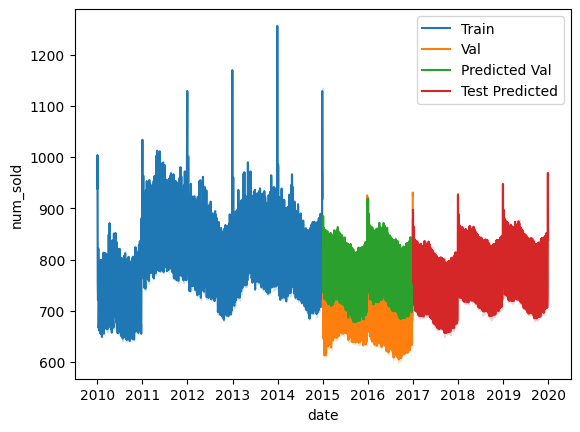

In [64]:
sns.lineplot(x=train_data.index, y=y_train, ci=False, label='Train')
sns.lineplot(x=val_data.index, y=y_val, ci=False, label='Val')
sns.lineplot(x=val_data.index, y=np.exp(cat_model.predict(val_data)), ci=False, label='Predicted Val')
sns.lineplot(x=X_test.index, y=np.exp(cat_model.predict(X_test)), ci=False, label='Test Predicted')
plt.legend()
plt.show()

In [65]:
submission = pd.DataFrame({'id': test_ids, 'num_sold': np.exp(cat_model.predict(X_test))})
submission.to_csv('cat_boost.csv', index=False)